In [12]:
#from langchain.chat_models import ChatOpenAI
#from langchain.chains import create_extraction_chain
from typing import List, Optional
from langchain_core.prompts import ChatPromptTemplate
from typing import Optional
from langchain_openai import ChatOpenAI
import networkx as nx
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_text_splitters import TokenTextSplitter
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from langchain_openai import OpenAI
# Download NLTK data (only need to run this once)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import os
from dotenv import load_dotenv
load_dotenv("api.env")
api_key = os.environ.get("OPENAI_API_KEY")
os.environ["OPENAI_API_KEY"] = api_key

from typing import Optional
from langchain.pydantic_v1 import BaseModel
from langchain.chains import create_extraction_chain_pydantic


[nltk_data] Downloading package punkt to /Users/yangz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/yangz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/yangz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Abstract and Introduction Text

In [112]:
# Abstract
abstract = """
Buckminsterfullerene (C60) was adsorbed onto single-walled carbon nanotubes (SWCNTs) as an electronacceptor to induce intermolecular charge-transfer with the SWCNTs, leading to a class of new metal-free C60 -SWCNT electrocatalysts. For the ﬁrst time, these newly developed C60 SWCNTs were demonstrated to act as trifunctional metal-free catalysts for oxygen reduction reaction (ORR), oxygen evolution reaction (OER), and hydrogen evolution reaction (HER) over a wide range of pH values, from acid to alkaline, with even higher electrocatalytic activities and better longterm stabilities than those of commercial Pt and RuO2  counterparts. Thus, the adsorption-induced intermolecular charge-transfer with the C 60 electron-acceptor can provide a general approach to high-performance, metal-free, pH-universal carbon-based trifunctional metal-free electrocatalysts for water-splitting and beyond.
"""

introduction ="""
Since the discovery of the ﬁrst C-MFEC in 2009, 8 enormous progress has been made and various carbon nanomaterials including carbon nanotubes (CNTs), graphene, and carbon quantum dots, doped with heteroatoms (e.g., N, B, S) have been developed for the ORR, OER, and/or HER electrocatalysis. 2,7,9 Besides, various heteroatom-doped carbon composites, such as graphene quantum dots/graphene nanoribbons and graphene/CNT structures, have also been reported for metal-free electrolysis. 10 For ORR, combined experimental and theoretical studies have revealed that the improved catalytic performance of heteroatom-doped carbons could be attributed to the electron-accepting/donating abilities of the heteroatom(s) to create net positive/negative charge(s) on adjacent carbon atoms to change the chemisorption mode of O 2 onto the C-MFECs, which eﬀectively weakens the O−O bonding and facilitates the ORR process.8,11 

In addition to the intramolecular charge-transfer that imparts ORR electrocatalytic activities to heteroatom-doped carbon nanotubes, graphene, and graphite described above, pure carbon CNTs or graphene, either in an aligned or nonaligned form, adsorbed with certain polyelectrolytes (e.g., PDDA) have also been demonstrated to act as metal-free electrocatalysts for ORR through the intermolecular chargetransfer from the all-carbon CNTs or graphene to the adsorbed PDDA 12a,b or PEDOT. 12c In particular, we demonstrated that the PDDA-adsorbed vertically aligned CNT electrode possesses remarkable electrocatalytic properties for ORR,12b  similar to those of a commercially available Pt/C electrode. These results clearly indicate that the important role of intermolecular charge-transfer to ORR can be applied to carbon nanomaterials in general for the development of various other metal-free eﬃcient ORR catalysts for fuel cell applications, even new catalytic materials for applications beyond fuel cells (e.g., metal−air batteries, electrochemical biosensors). These previous studies prompted us to leverage the strong charge-transfer eﬀects between uncharged C 60 and CNTs for producing stable and eﬃcient multifunctional electrocatalysts largely free from heteroatom-doping and defect, a promising possibility that has not been recognized so far.

Owing to its unique spherical molecular structure, with all sp2 -hybridized carbon atoms, and unparalleled electron aﬃnity, capable of accepting six electrons per C 60 molecule, buckminsterfullerene (C60 ) has been widely studied for biomedical and optoelectronic applications. 13 As such, various C60 -CNT composites, including C60 -encapsulated CNT peapod structures 14 and C60 -grafted CNTs, 15 have been developed for electrochemical sensing and many other applications. However, the possible application of C 60 for electrocatalysis has rarely been discussed in the literature. To our best knowledge, no C60 -based multifunctional electrocatalyst has been reported to date.

In this study, we adsorbed C 60 onto single-walled carbon nanotubes (SWCNTs) to cause intermolecular charge-transfer with SWCNTs, leading to even better electrocatalytic activities than those of commercial Pt and RuO 2 catalysts for ORR, OER, and HER. We further demonstrated that the resultant high-performance C60 -SWCNT multifunctional electrocatalysts are promising for water-splitting 16 and beyond. 17 As schematically shown in Figure 1a, the newly developed C60 SWCNTs can act as both eﬃcient metal-free ORR/OER/HER trifunctional and OER/HER bifunctional catalysts (vide infra). Therefore, this work has not only opened up new applications for C 60 but also provided a facile, but eﬃcient and cost-eﬀective, approach to metal-free, heteroatom-/defect-free multifunctional ORR/OER/HER catalysts simply by adsorbing C 60 onto SWCNTs.
"""

In [114]:
splited_content =[

"""Buckminsterfullerene (C60) was adsorbed onto single-walled carbon nanotubes (SWCNTs) as an electronacceptor to induce intermolecular charge-transfer with the SWCNTs, leading to a class of new metal-free C60 -SWCNT electrocatalysts. For the ﬁrst time, these newly developed C60 SWCNTs were demonstrated to act as trifunctional metal-free catalysts for oxygen reduction reaction (ORR), oxygen evolution reaction (OER), and hydrogen evolution reaction (HER) over a wide range of pH values, from acid to alkaline, with even higher electrocatalytic activities and better longterm stabilities than those of commercial Pt and RuO2  counterparts. Thus, the adsorption-induced intermolecular charge-transfer with the C 60 electron-acceptor can provide a general approach to high-performance, metal-free, pH-universal carbon-based trifunctional metal-free electrocatalysts for water-splitting and beyond.
""", 

"""
Since the discovery of the ﬁrst C-MFEC in 2009, 8 enormous progress has been made and various carbon nanomaterials including carbon nanotubes (CNTs), graphene, and carbon quantum dots, doped with heteroatoms (e.g., N, B, S) have been developed for the ORR, OER, and/or HER electrocatalysis. 2,7,9 Besides, various heteroatom-doped carbon composites, such as graphene quantum dots/graphene nanoribbons and graphene/CNT structures, have also been reported for metal-free electrolysis. 10 For ORR, combined experimental and theoretical studies have revealed that the improved catalytic performance of heteroatom-doped carbons could be attributed to the electron-accepting/donating abilities of the heteroatom(s) to create net positive/negative charge(s) on adjacent carbon atoms to change the chemisorption mode of O 2 onto the C-MFECs, which eﬀectively weakens the O−O bonding and facilitates the ORR process.8,11 
""",

"""
In addition to the intramolecular charge-transfer that imparts ORR electrocatalytic activities to heteroatom-doped carbon nanotubes, graphene, and graphite described above, pure carbon CNTs or graphene, either in an aligned or nonaligned form, adsorbed with certain polyelectrolytes (e.g., PDDA) have also been demonstrated to act as metal-free electrocatalysts for ORR through the intermolecular chargetransfer from the all-carbon CNTs or graphene to the adsorbed PDDA 12a,b or PEDOT. 12c In particular, we demonstrated that the PDDA-adsorbed vertically aligned CNT electrode possesses remarkable electrocatalytic properties for ORR,12b  similar to those of a commercially available Pt/C electrode. These results clearly indicate that the important role of intermolecular charge-transfer to ORR can be applied to carbon nanomaterials in general for the development of various other metal-free eﬃcient ORR catalysts for fuel cell applications, even new catalytic materials for applications beyond fuel cells (e.g., metal−air batteries, electrochemical biosensors). These previous studies prompted us to leverage the strong charge-transfer eﬀects between uncharged C 60 and CNTs for producing stable and eﬃcient multifunctional electrocatalysts largely free from heteroatom-doping and defect, a promising possibility that has not been recognized so far.
""",

"""
Owing to its unique spherical molecular structure, with all sp2 -hybridized carbon atoms, and unparalleled electron aﬃnity, capable of accepting six electrons per C 60 molecule, buckminsterfullerene (C60 ) has been widely studied for biomedical and optoelectronic applications. 13 As such, various C60 -CNT composites, including C60 -encapsulated CNT peapod structures 14 and C60 -grafted CNTs, 15 have been developed for electrochemical sensing and many other applications. However, the possible application of C 60 for electrocatalysis has rarely been discussed in the literature. To our best knowledge, no C60 -based multifunctional electrocatalyst has been reported to date.
""",

"""
In this study, we adsorbed C 60 onto single-walled carbon nanotubes (SWCNTs) to cause intermolecular charge-transfer with SWCNTs, leading to even better electrocatalytic activities than those of commercial Pt and RuO 2 catalysts for ORR, OER, and HER. We further demonstrated that the resultant high-performance C60 -SWCNT multifunctional electrocatalysts are promising for water-splitting 16 and beyond. 17 As schematically shown in Figure 1a, the newly developed C60 SWCNTs can act as both eﬃcient metal-free ORR/OER/HER trifunctional and OER/HER bifunctional catalysts (vide infra). Therefore, this work has not only opened up new applications for C 60 but also provided a facile, but eﬃcient and cost-eﬀective, approach to metal-free, heteroatom-/defect-free multifunctional ORR/OER/HER catalysts simply by adsorbing C 60 onto SWCNTs.
"""
]

# Main Topic

In [115]:
llm = ChatOpenAI(temperature=0, model="gpt-4-turbo")

class MainMaterial(BaseModel):
    main_material_name: Optional[str] = Field (default = None, description="Name of the material, This could be different from conventional represnetation since authors may use their own symbol to represent a newly developed matreials. For example carbon nanotube synthesized at 60 degree may be written as CNT@60")
    chemical_symbol: Optional[str] = Field (default = None, description="Chemical symbol representation of the material")


main_topic_prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful AI bot of a material scientist specialized in electrocatalyst. Carefully read the abstract provided. You need to identify what is the main materials reported in this literature. The paper typically reports a new material or a new combination of materials. You need to extract the full name described as well as any chemical symbols. For example carbon nanotube synthesized at 60 degree may be written as CNT@60. The abstract is as follows: {abstract}"),
    ("human", "{abstract}")
])

main_topic_runnable = main_topic_prompt | llm.with_structured_output(schema=MainMaterial)
main_topic_response = main_topic_runnable.invoke({"abstract":{abstract}})

In [116]:
main_topic_response

MainMaterial(main_material_name='C60-SWCNT electrocatalysts', chemical_symbol='C60 SWCNTs')

# Causal Graph

In [117]:

class CauseEffectPairs(BaseModel):
    pairs: str = Field(
        default=None, 
        description="Identify factors related to electrocatalyst performance. Your answer should be a list of tuples, where each tuple (A, B) indicates A causes B or A is related to B. For example, ('temperature', 'reaction rate') indicates that temperature causes the reaction rate."
    )
    positive: Optional[bool] = Field(
        default=None, 
        description="Whether the relationship between the factors and the performance of the new materials is positive or negative."
    )
    
class Causality(BaseModel):
    introduction: Optional[CauseEffectPairs] = Field(default=None, description="List of factors related to materials properties described in the text.")

prompt_main_topic = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful assistant to an electrocatalyst material scientist. Carefully read each sentence provided from an abstract and introduction, from a paper related to a new material for electrocatalysis. Your task is (1) to identify the factors related to materials properties described in the text. and (2) evaluate the causal relationships between the factors and the performance of the new materials. Note acedmemic writting usually starts with a claim, followed by supporting evidence. You dont have to generate a triplet to if there is no causal relationship between the factors and the performance of the new materials."),
    ("human", "{introduction}"),
])

# text_splitter = TokenTextSplitter(
#     # Controls the size of each chunk
#     chunk_size=100,
#     # Controls overlap between chunks
#     chunk_overlap=10,
# )

# splited_content= text_splitter.split_text(abstract+introduction)

len(splited_content)


merged_response=[]
for i in range(len(splited_content)):
    runnable = prompt_main_topic | llm.with_structured_output(schema=Causality)
    response = runnable.invoke({"introduction": {splited_content[i]}})
    merged_response.append(response.introduction)


causal_pairs = []
for response in merged_response:
    if ',' not in response.pairs or len(response.pairs.split(","))!=2:
        continue
    cause, effect = response.pairs.split(",")
    
    direction = response.positive
    causal_pairs.append((cause, effect, direction))
    print(f"{cause} -> {effect} ({'positive' if direction else 'negative'})")



adsorption-induced intermolecular charge-transfer ->  enhanced electrocatalytic activities and stabilities (positive)
heteroatom doping ->  improved catalytic performance (positive)
intermolecular charge-transfer ->  electrocatalytic properties (positive)
unique spherical molecular structure ->  electron affinity -> electrocatalysis potential (positive)
adsorption of C60 onto SWCNTs ->  enhanced electrocatalytic activities (positive)


adsorption-induced intermolecular charge-transfer ->  enhanced electrocatalytic activities and stabilities (positive) is similar to intermolecular charge-transfer ->  electrocatalytic properties (positive)


/var/folders/z8/zm1gct552gb8700n_kq3pm9h0000gn/T/ipykernel_9417/950617668.py:45: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=colors)


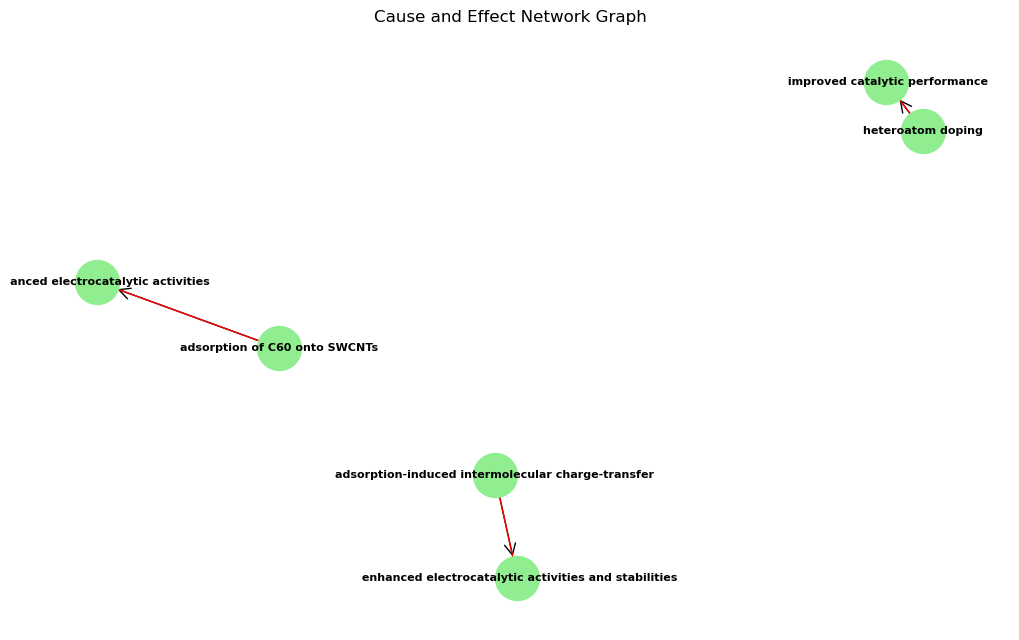

In [118]:

# LLM to deduplicate the causal pairs
class Similiarity(BaseModel):
    is_similar: bool = Field(False, description="Whether the two cause effect pairs are similar or not.")

similar_prompt = ChatPromptTemplate.from_messages([(
    "system", "You are a helpful assistant to an electrocatalyst material scientist. Your task is to evaluate whether the two cause effect pairs are similar or not. Note that similiartity mainly indicates some duplicated (slightly different but similar) pairs caused by LLM extraction/summary. Slight different in material's nature does NOT count as similarity."),
    ("human", "Are the pairs {pair1} and {pair2} similar or describe the same relationship?")])

duplicated = set()
for i in range(len(causal_pairs)):
    for j in range(i+1, len(causal_pairs)):
        pair1 = causal_pairs[i]
        if j < len(causal_pairs):
            pair2 = causal_pairs[j]
            runnable = similar_prompt | llm.with_structured_output(schema=Similiarity)
            response = runnable.invoke({"pair1": {pair1}, "pair2" : {pair2}})
            if response.is_similar:
                print(f"{pair1[0]} -> {pair1[1]} ({'positive' if pair1[2] else 'negative'}) is similar to {pair2[0]} -> {pair2[1]} ({'positive' if pair2[2] else 'negative'})")
                causal_pairs.pop(j)
                duplicated.add(j)



# 创建有向图
G = nx.DiGraph()

# 添加边及其颜色
edges = []
colors = []
for i in range(len(causal_pairs)):
    if i in duplicated:
        continue
    A, B, positive = causal_pairs[i]
    G.add_edge(A, B)
    edges.append((A, B))
    if positive == True:
        colors.append('red')
    else:
        colors.append('blue')

# 绘制图形
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)  # 节点布局
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1000, font_size=8, font_weight='bold', arrows=True, arrowstyle='->', arrowsize=20)
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=colors)

plt.title("Cause and Effect Network Graph")
plt.show()

In [119]:
factors = set()
for i in range(len(causal_pairs)):
    A, B, positive = causal_pairs[i]
    factors.add(A)
    factors.add(B)
print(factors)

{'adsorption of C60 onto SWCNTs', 'unique spherical molecular structure', ' enhanced electrocatalytic activities', ' electron affinity -> electrocatalysis potential', 'heteroatom doping', ' improved catalytic performance', 'adsorption-induced intermolecular charge-transfer', ' enhanced electrocatalytic activities and stabilities'}


In [12]:
causal_pairs

[('adsorption-induced intermolecular charge-transfer',
  ' enhanced electrocatalytic activities and stabilities',
  True),
 ('heteroatom doping', ' improved catalytic performance', True),
 ('intermolecular charge-transfer', ' ORR electrocatalytic activities', True),
 ('adsorbing C60 onto SWCNTs', ' enhanced electrocatalytic activities', True)]

/var/folders/z8/zm1gct552gb8700n_kq3pm9h0000gn/T/ipykernel_9417/2192408178.py:92: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=colors)


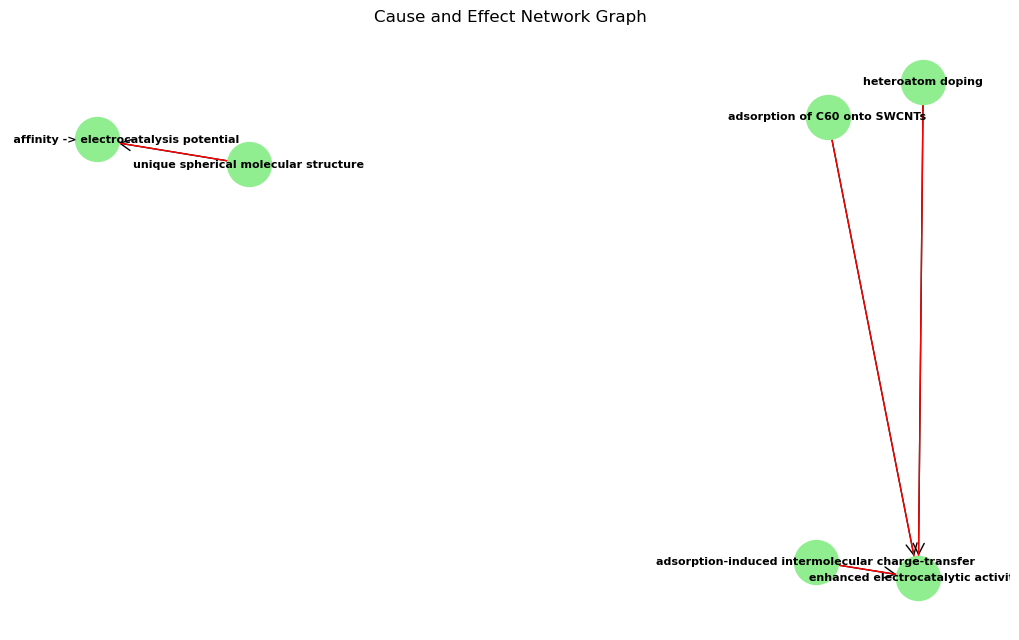

{'adsorption of C60 onto SWCNTs', 'unique spherical molecular structure', ' enhanced electrocatalytic activities', ' electron affinity -> electrocatalysis potential', 'heteroatom doping', 'adsorption-induced intermolecular charge-transfer'}


In [120]:
from pydantic import BaseModel, Field
from typing import List, Tuple, Dict, Set
import networkx as nx
import matplotlib.pyplot as plt
from langchain.prompts import ChatPromptTemplate
from langchain.llms import OpenAI

# # 示例因子和因果关系对
# causal_pairs = [("H2", "O2", True), ("Hydrogen", "Oxygen", True), ("CO", "CO2", True), ("Carbon monoxide", "Carbon dioxide", True)]

class Similarity(BaseModel):
    is_similar: bool = Field(False, description="Whether the two factors are similar or not.")

similar_prompt = ChatPromptTemplate.from_messages([(
    "system", "You are a helpful assistant to an electrocatalyst material scientist. Your task is to evaluate whether the two factors are similar or not. Note that similarity mainly indicates some duplicated (slightly different but similar) factors caused by LLM extraction/summary. Slight different in nature does NOT count as similarity."),
    ("human", "Are the factors {factor1} and {factor2} similar or describe the same concept?")
])

def are_factors_similar(factor1: str, factor2: str) -> bool:
    runnable = similar_prompt | llm.with_structured_output(schema=Similarity)
    response = runnable.invoke({"factor1": factor1, "factor2": factor2})
    return response.is_similar

# 并查集（Union-Find）数据结构
class UnionFind:
    def __init__(self):
        self.parent = {}
    
    def find(self, x):
        if self.parent.setdefault(x, x) != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]
    
    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            self.parent[rootY] = rootX

# 合并相似的因子
def merge_factors(factors: Set[str]) -> Dict[str, str]:
    uf = UnionFind()
    factors = list(factors)
    for i in range(len(factors)):
        for j in range(i + 1, len(factors)):
            if are_factors_similar(factors[i], factors[j]):
                uf.union(factors[i], factors[j])
    
    merged = {}
    for factor in factors:
        root = uf.find(factor)
        if factor != root:
            merged[factor] = root
    return merged

# 获取因子集合
factors = set()
for A, B, _ in causal_pairs:
    factors.add(A)
    factors.add(B)

# 合并相似的因子
merged_factors = merge_factors(factors)

# 更新因果关系对
updated_causal_pairs = []
for A, B, positive in causal_pairs:
    updated_A = merged_factors.get(A, A)
    updated_B = merged_factors.get(B, B)
    updated_causal_pairs.append((updated_A, updated_B, positive))

# 创建有向图
G = nx.DiGraph()

# 添加边及其颜色
edges = []
colors = []
for A, B, positive in updated_causal_pairs:
    G.add_edge(A, B)
    edges.append((A, B))
    if positive:
        colors.append('red')
    else:
        colors.append('blue')

# 绘制图形
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)  # 节点布局
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1000, font_size=8, font_weight='bold', arrows=True, arrowstyle='->', arrowsize=20)
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=colors)

plt.title("Cause and Effect Network Graph")
plt.show()

# 输出合并后的因子集合
final_factors = set()
for A, B, _ in updated_causal_pairs:
    final_factors.add(A)
    final_factors.add(B)
print(final_factors)

In [121]:
final_factors, updated_causal_pairs

({' electron affinity -> electrocatalysis potential',
  ' enhanced electrocatalytic activities',
  'adsorption of C60 onto SWCNTs',
  'adsorption-induced intermolecular charge-transfer',
  'heteroatom doping',
  'unique spherical molecular structure'},
 [('adsorption-induced intermolecular charge-transfer',
   ' enhanced electrocatalytic activities',
   True),
  ('heteroatom doping', ' enhanced electrocatalytic activities', True),
  ('unique spherical molecular structure',
   ' electron affinity -> electrocatalysis potential',
   True),
  ('adsorption of C60 onto SWCNTs',
   ' enhanced electrocatalytic activities',
   True)])

# Main text

In [5]:
raw_content = """
In a typical experiment, the adsorption of C 60 onto SWCNTs was carried out by simply dispersing SWCNTs in an aqueous solution of C 60 for different durations (denoted as C60-SWCNTn , n = 5, 10, 15, and 20 min; see Experimental Section). The content of C 60 in C60 -SWCNT n (n = 5, 10, 15, and 20 min) was monitored by UV−vis absorption measurements. As shown in Figure 1b, the intensities of the characteristic absorption bands of the C 60 solution at 277 and 360 nm, 19 respectively, decreased with increasing n (n = 5, 10, and 15 min), indicating that an increased number of C60  molecules were adsorbed onto the SWCNT in C60 -SWCNTn  samples with increasing adsorption time (Figure 1c). Over adsorption for 15 min, however, the C 60 adsorption bands remained unchanged (e.g., C60 -SWCNT15 , C60 -SWCNT 20 in Figure 1b,c), suggesting that the adsorption of C 60 onto the surface of SWCNTs was saturated after 15 min adsorption in this particular case, and hence the similar amount of adsorbed C 60 for both the C60 -SWCNT 15 and C60 -SWCNT20 . Figures S1 and S3 show transmission electron microscopy (TEM) images for pure C60 , SWCNTs, and the resultant C60 -SWCNT n (n = 5, 10, and 15 min), which revealed a diameter of 1.2 nm for the SWCNT (Figure S1a), as also supported by the radial breathing modes (RBMs) of SWCNTs at 217.3 cm−1 , corresponding to a nanotube diameter of 1.14 nm (Figure S2).20 Figure S1b reproduces a typical TEM image for pure C60  nanoparticles with a diameter of about 1.3 nm, revealing particle features similar to those of the C 60 nanoparticles in the C60 -SWCNT n (n = 5, 10, 15 min) shown in Figure S3. Other evidence for physical adsorption of C 60 on SWCNTs comes from FTIR spectra (Figure S4), which show that the FT-IR spectrum of C60 -SWCNTs is a simple combination of those for C 60 and SWCNTs without any peak position shift, indicating no strong chemical interaction between C 60 and SWCNTs. The XRD patterns in Figure S5 show that the C60 , SWCNTs, and C60 -SWCNT 15 all have a high degree of crystallization, implying a good charge mobility and electrochemical stability for C60 -SWCNT 15 free from heteroatom and defect (Figure 1d−f).20 

The corresponding X-ray photoelectron spectroscopy (XPS, Figure 1d) clearly veriﬁed the absence of any metal elements for SWCNTs produced by the metal-free growth, 9d but the presence of O and Si apart from C. The O and Si with an atomic ratio of O to Si of 2.11 are from the SiO 2 substrate used for the SWCNTs XPS measurements. XPS and Raman measurements were also performed to conﬁrm the adsorption of C 60 onto SWCNTs as well as the associated intermolecular charge-transfer. Compared to the C 1s XPS peak for pure C60 , the C 1s XPS peak positions for C60 -SWCNT n (n = 0, 5, 10, and 15 min) show a negative shift to lower binding energies with increasing adsorption time n (Figure 1e), indicating the occurrence of charge-transfer from the SWCNTs to C60 . 9d The observed intermolecular charge-transfer was also supported by Raman spectroscopic measurements carried out for the pure SWCNTs before and after adsorption with C60 . As expected, the Raman spectrum of SWCNTs displays two prominent peaks at ∼1611 and ∼1344 cm −1 corresponding to the G- and D-bands, respectively, while Raman spectrum of C 60 shows only one peak at ∼1643 cm−1 . Raman spectra of C60 -SWCNT n (n = 5, 10, and 15 min) exhibit a slight increase in the intensity ratio of the D-band to the G-band with increasing C60  adsorption time (Figure 1f), also accompanied by an upshift of the peak positions. While the upshift in the peak position supports the charge-transfer from SWCNTs to the electronwithdrawing C60 , the increase in the peak intensity ratio of the D-band to G-band (ID /IG ) for C60 -SWCNT n (n = 5, 10, 15 min) indicates that the nanotube structure became slightly more disordered via the adsorption-induced charge-transfer to C60 .

To investigate electrocatalytic properties, we initially performed the ORR measurements on C60 -SWCNT n (n = 5, 10, and 15 min) in 0.1 M KOH. For comparison, pure C60 , pure SWCNTs, and Pt/C (20 wt%, Johnson Matthey) were also measured under the same conditions. Compared with the pure C 60 (onset potential, E onset = 0.62 V, half-wave potential, E 1/2 = 0.53 V, and diﬀusion-limiting current, I dl = 0.24 mA/ cm2 ) and SWCNTs (E onset = 0.84 V, E 1/2 = 0.80 V, and I dl = 0.32 mA/cm2 ), all the C60 -SWCNT n (n = 5, 10, and 15 min) catalysts showed better ORR performance (Figure S6 and Table S1). These results conﬁrm that charge-transfer between the adsorbed C 60 and SWCNTs have indeed contributed to the ORR electrocatalytic activity for the C60 -SWCNTs. Among all the C60 -SWCNT n (n = 5, 10, and 15 min) samples, the highest ORR activity was observed for C60 -SWCNT 15 in terms of Eonset  (0.91 V), E 1/2 (0.84 V), and I dl (1.73 mA/cm2 , Figure S6), presumably due to the lowest charge-transfer resistance (Figure S7) at this mass ratio. Therefore, we focus mainly on the C60 -SWCNT 15 below.

To start with, we carried out cyclic voltammetry (CV) measurements of C60 -SWCNT 15 in a conventional threeelectrode electrochemical cell in an O2 - or N2 -saturated 0.1 M aqueous KOH solution. As shown in Figures 2a and S8, a characteristic oxygen reduction peak at 0.86, 0.79, and 0.48 V (versus RHE) was observed for the C60 -SWCNT15 , pure SWCNTs, and C60 , respectively, in O2 -saturated 0.1 M aqueous KOH, but not in the N2 -saturated electrolyte, indicating a high ORR activity for the C60 -SWCNT15 . Furthermore, the C60 -SWCNT 15 electrode exhibited an excellent stability for the ORR with respect to Pt/C. Figure 2c shows only 7.4% current reduction for the C60 -SWCNT15  catalyst after a 50 h chronoamperometric test at 0.7 V with O2  continuously ﬂowing into 0.1 M KOH. However, the Pt/C catalyst lost 9.9% of its initial activity under the same conditions, indicating a higher ORR stability for the C60 SWCNTs than that of the commercial Pt/C (Figure 2c).

To further investigate impacts of the charge-transfer between C 60 and SWCNTs and to demonstrate the potential applications of C60 -SWCNTs as trifunctional catalysts for ORR, OER, and HER, we also measured the OER performance for C60 -SWCNT n (n = 5, 10, 15 min) samples in a 0.1 M KOH electrolyte. As shown in Figures 2d and S9, C60 SWCNT 15 exhibited the highest catalytic activity for the OER (Table S2). At 1.69 V potential, the current density of C60 SWCNT 15 (10 mA cm−2 ) is 50, 5.3, and 1.2 times higher than those of the pure C60 , SWCNTs, and commercial RuO2 , respectively (Figure 2d). These observations clearly demonstrated that the charge-transfer from C 60 to SWCNT has also signiﬁcantly enhanced the electrocatalytic activity of C60 SWCNTs for OER. Moreover, the C 60 -SWCNT 15 electrocatalyst produced a much lower Tafel slope (46.7 mV dec−1 ) compared with those of the pure C −1 60 (50.5 mV dec−1 ) and SWCNTs electrodes (79.7 mV dec ), though still slightly higher than that of RuO 2 (38.1 mV dec−1 ), indicating more favorable kinetics toward OER by the C60 -SWCNT 15 electrode (Figure 2e). The steady-state current densities of the C60 SWCNT 15 show only 7.9% current reduction for 10 h at 1.65 V in 0.1 M KOH electrolyte (Figure 2f), while they remain unchanged at the initial state (inset of Figure 2f). In contrast, 15.1% of the initial activity of RuO 2 was lost (Figure 2f) under the same conditions. Remarkably, the C60 -SWCNT 15 exhibited a ΔE of 0.82 V (Figure S10), which is much lower than that of some other carbon-based metal-free materials (e.g., Ngraphene/CNT, ΔE = 1.00 V; 21 g-C3 N4 -carbon-ﬁber paper, ΔE = 1.06 V22 ).

In addition, HER activities of the C60 -SWCNT n (n = 5, 10,and 15 min) were also investigated in N2 -saturated 0.1 M KOH electrolyte using a three-electrode setup. For comparison, we have recorded the linear sweep voltammetry (LSV) curves for the pure C60 , SWCNTs, and Pt/C. As shown in Figures 2g and S11, all the C60 -SWCNT n (n = 5, 10, 15 min) catalysts exhibited enhanced catalytic activity compared with the pure C 60 and SWCNTs. In particular, C60 -SWCNT15  showed an onset overpotential of ∼114 mV (Table S3). The corresponding Tafel plots (Figure 2h) show a lower Tafel slope (120.8 mV dec −1 ) for C60 -SWCNT 15 than those of C60  (202.7 mV dec −1 ) and SWCNTs (139.2 mV dec −1 ), suggesting that the release of molecular hydrogen on the C60 -SWCNT 15 is the rate-limiting step.17 

The overpotential required to achieve the current density of 10 mA cm −2 (Figure 2g) for the C60 -SWCNT 15 and Pt/C are −0.38 and −0.14 V, respectively. Figure 2i displays the polarization curves for the C60 -SWCNT 15 electrode before and after the continuous HER process (15 h), showing only a slight decrease (7.1%) in performanceeven more stable than the Pt/C electrode (10.7%). Overall, the C60 -SWCNT 15 catalyst exhibited a low onset potential, high current density, and longterm stability, also promising for HER in the alkaline medium. These results indicate that the C60 -SWCNT 15 is a promising eﬃcient trifunctional catalyst for simultaneous water-splitting and ORR.

As can be seen from the above discussion, the C60 -SWCNT catalysts newly developed in this study have been demonstrated to show excellent trifunctional electrocatalytic performance in alkaline media. However, pH values for catalysts to show the best performance for ORR, OER, or HER are usually diﬀerent. 7e Unlike most HER electrocatalysts, ORR and OER electrocatalysts often show better performance in an alkaline medium than acidic electrolyte. 7e,10d This makes it very diﬃcult, if not possible, to develop integrated energy systems for practical applications, for instance, when HER is coupled with OER in an overall water-splitting process. Therefore, it is important to develop low-cost, pH-universal trifunctional electrocatalysts for eﬀectively catalyzing ORR, OER, and HER simultaneously at any speciﬁc pH values.

Compared to alkaline and acidic electrolytes, the benign and harmless pH-neutral medium could simplify the situation for optimization of the ORR, HER, and OER trifunctional electrocatalysts. It is thus highly desirable, though still challenging, to develop eﬃcient trifunctional C-MFECs to achieve high catalytic activities toward OER and HER for overall water-splitting 23 and ORR for microbial fuel cells24  under neutral conditions. In this regard, we further tested the electrocatalytic performance of C60 -SWCNT 15 for ORR, OER, and HER with a typical three-electrode system in a phosphate buﬀer solution (pH = 7). As shown in Figures 3a and S12, characteristic oxygen reduction peaks at 0.71, 0.63, and 0.60 V (versus RHE) were observed for the C60 -SWCNT15 , pure SWCNTs, and C60 , respectively, in the O2 -saturated phosphate buﬀer solution, but not in the corresponding N2 -saturated electrolyte under the same condition. As expected, the C60 SWCNT 15 exhibited also the highest ORR activity in the neutral phosphate buﬀer solution. This is also conﬁrmed by the LSV curves shown in Figures 3b and S13, which reveal E onset = 0.81 V, E 1/2 = 0.77 V, and I dl = 1.31 mA/cm 2 for the C60 SWCNT15 , outperforming the C60 , SWCNTs and other C60 SWCNT n (n = 5 and 10 min), though still slightly inferior to the Pt/C electrode. Furthermore, Figure 3c shows results from the chronoamperometric test under 0.6 V with continuous O2  ﬂow in the phosphate buﬀer solution for the C60 -SWCNT electrode, revealing only a 6.3% reduction in current from the initial state after a 20 h, which is lower than that of the commercial Pt/C catalyst (a 9.9% loss) under the same condition. As shown in the inset of Figure 3c, the corresponding LSV curves for the C60 -SWCNTs remained almost unchanged, indicating that the C60 -SWCNTs is also slightly more stable than the commercial Pt/C electrode toward ORR at the neutral pH.

We also tested the OER and HER performance of the C60 SWCNT n (n = 5, 10, and 15 min) catalysts in the phosphate buﬀer solution. For comparison, pure C60 , pure SWCNTs, Pt/ C (20 wt%, Johnson Matthey), and RuO 2 were also measured under the same conditions. Figures 3d and S14 show 970, 720, 770, 620, and 480 mV at 10 mA cm −2 for the pure C60 , pure SWCNTs, C60 -SWCNT5 , C60 -SWCNT10 , and commercial RuO2 , respectively (see also Table S5). In contrast, the C60 SWCNT 15 electrocatalyst exhibited a relatively low overpotential of 520 mV at 10 mA cm −2 with a low onset overpotential of 230 mV (Figure 3d). Notably, the current density of C 60 -SWCNT at an overpotential of 600 mV is 20.0 mA cm−2 , which is 14.115 and 3.5 times higher than those of the pure C 60 (1.4 mA cm−2 ) and SWCNTs (5.8 mA cm−2 ), respectively, and even superior to the commercial RuO 2 (15.5 mA cm −2 ). The C 60 -SWCNT showed a Tafel slope of 129 mV dec −1 (Figure 3e), which15 is comparable to that of the commercial RuO (141.1 mV dec −1 ), but much lower than those of the pure 2 C 60 (848.2 mV dec −1 ) and SWCNTs (848.2 and 468.1 mV dec −1 ). As expected, Figure S15 shows the smallest charge-transfer resistance for C60 -SWCNT 15 among the pure C60 , SWCNTs, C60 -SWCNT5 , and C60 -SWCNT10 . As can be seen in Figure 3f, the catalytic activity of C60 -SWCNT15,  along with the LSV curves (inset of Figure 3f), remained almost unchanged for more than 7.5 h. These results suggest that C60 -SWCNT 15 also exhibited an unprecedentedly remarkable catalytic activity and stability toward the OER in the neutral medium.

Figures 3g and S16 show the HER LSV curves for all the samples investigated in this study in the neutral phosphate buﬀer solution. As expected, the pure C 60 has negligible electrocatalytic activity toward HER, and Pt/C showed the best performance with nearly zero overpotential. C60 SWCNT 15 exhibited a sharply rising current density with increasing negative potential and a low onset overpotential of 60 mV, suggesting a high HER catalytic activity for the C60 SWCNT15 . For comparison, the C60 -SWCNT 15 exhibited an overpotentials of 329 mV at 10 mA cm−2 , while the corresponding overpotentials for the pure SWCNTs, C60 - SWCNT5 , and C60 -SWCNT 10 are 738, 420, and 327 mV, respectively (Table S6). Figure 3h shows the Tafel slopes for the Pt/C electrocatalyst (76.7 mV dec −1 ), C 60 -SWCNT 15 (166.1 mV dec−1 ), and pure SWCNTs (236.9 mV dec−1 ) in the neutral medium. The steady-state current density of the C60 -SWCNT 15 shows a small change (8.8%) even after 15 h (Figure 3i), even smaller than the corresponding value of 12% for the Pt/C catalyst, along with the almost unchanged LSV curves for the C60 -SWCNT 15 (inset of Figure 3i). Clearly, therefore, the C60 -SWCNT 15 is also a good metal-free HER catalyst in the neutral medium.

The OER performance of C60 -SWCNT n (n = 5, 10, 15 min) catalysts was also measured in 0.5 M H2 SO4 , for comparison with pure C60 , SWCNTs, and commercial RuO 2 catalyst (Table S7). Figures 4a and S17 show an onset potential of ∼1.26 V for the C60 -SWCNT15 , which represents an overpotential of ∼420 mV and is even lower than that of RuO2  catalyst (∼1.28 V, overpotential ∼430 mV). The Tafel slope shown in Figure 4b for the C60 2 -SWCNT 15 is 38.4 mV dec −1 , which is similar to that of RuO catalyst (37.4 mV dec −1 ). The steady-state current density of the C60 -SWCNT 15 showed a small change (5.0%) even after 1.5 h in 0.5 M H2 SO 4 (Figure 4c), similar to the corresponding value of 5.4% for the commercial RuO 2 catalyst, along with the almost unchanged LSV curves for the C60 -SWCNT 15 (inset of Figure 4c). These results indicate a good stability for C60 -SWCNT 15 toward OER, even in the acidic medium. The electrocatalytic performance of the C60 -SWCNT electrode for HER were also measured with a three-electrode conﬁguration in 0.5 M H2 SO4 . As can be seen in Figures 4d and S18, the pure C60  showed almost no catalytic activity, while SWCNT electrode exhibited much better catalytic performance with an onset potential of ∼145 mV and overpotential of 1015 mV at 10 mA cm −2 for HER in the acidic medium. Surprisingly, the C60 SWCNT n (n = 0, 5, 10, and 15 min) electrodes showed much improved electrocatalytic performance, in respect to both pure C 60 and SWCNTs, with a relatively low onset potential of ∼108 and 320 mV overpotential at 10 mA cm −2 current (Figure 4d, Table S8). As displayed in Figure 4e, the Tafel slope of C 60 -SWCNT 15 for HER is 73.2 mV dec −1 , which is the smallest among those for the pure C 60 (568 mV dec −1 ) and SWCNTs electrocatalysts (118.2 mV dec −1 ). The observed low Tafel slope indicates a fast HER process for C60 SWCNT15 . The fast OER and HER reaction kinetics of C60 SWCNT 15 is also reﬂected by the smallest charge-transfer resistance for C60 -SWCNT 15 among the pure C60 , SWCNTs, and C60 -SWCNT n (n = 0, 5, 10, and 15 min) (Figure S19). The steady-state current density of the C60 -SWCNT 15 showed a small change (2.9%) after 20 h (Figure 4f), even smaller than the corresponding value of 4.4% for the commercial Pt/C catalyst, along with the almost unchanged LSV curves for the C60 -SWCNT 15 before and after the chronoamperometric test (inset of Figure 4f). Thus, the C60 -SWCNT 15 also showed a superior stability to the Pt/C toward HER in acidic medium. Table 1 summarizes electrocatalytic properties for the C60 SWCNT 15 at various pHs.

To demonstrate potential applications for the C60 SWCNT15 , we investigated a two-electrode electrochemical water-splitting setup, in which the C60 -SWCNT 15 was used as both anode and cathode for OER and HER, respectively, in several diﬀerent electrolyte solutions (e.g., 0.1 M KOH, phosphate buﬀer solution, and 0.5 M H2 SO4 ). As seen in Figure S21a, the C60 -SWCNT 15 HER electrode (with the same C60 -SWCNT 15 as the OER counter electrode) showed a small onset potential of −210 mV and a gradually increased current density with increasing potential. In conjunction with the other half of the water-splitting OER reaction (Figure S21b), the galvanostatic cycling method demonstrated an attractive two electrode water-splitting process for the setup based on the C60 -SWCNT 15 bifunctional catalysts, which is comparable to its counterpart based on the Pt/C for ORR and RuO 2 for OER. Similar to the control setup, Figure S21c shows a good operation stability for the electrochemical water-splitting setup, in which the C60 -SWCNT 15 was used as both the anode and cathode for OER and HER, respectively. H 2 bubbles generated from the C60 -SWCNT 15 electrode during the water-splitting process could easily leave from the electrode surface (inset Figure S21c) to ensure a long-term stability. C60 -SWCNT15  was also found to show superior water-splitting performance in acidic and neutral media (see Figures S22 and S23).

To gain a better mechanistic understanding of the observed electrocatalytic activities for C60 -SWCNT 15 catalysts, we performed energy level diagram analyses (Figure S24). As can be seen in Figure S24, the LUMO level of C 60 (−4.46 eV) matches well with the energy level for the HER and ORR while the HOMO level of the SWCNTs (−6.38 eV) is favorable for the OER. The bandgaps of the SWCNTs (6.38 to 4.34 eV)25  and C 60 (6.30 to 4.46 eV) 26 are in the visible region. Therefore, the formation of the C60 -SWCNTs junction enabled the observed metal-free electrocatalysis for HER, ORR, and OER as well as the use of visible light to aﬀect the electrocatalytic performance of C60 -SWCNTs.

To investigate the possible light eﬀects, we used 404.7579.0 nm visible light (mercury lamp, 1.0 W cm−2 ) to excite the C60 -SWCNT15 . Indeed, it was found that exposure of C60 SWCNT 15 to visible light enhanced electrocatalytic activities for ORR/HER/OER in O2 -saturated 0.1 M KOH solution and in phosphate buﬀer solution (Figures S25 and S26). However, the ORR/HER/OER performance of pure C 60 and SWCNTs remained unchanged even when they were exposed to the same visible light under the same conditions (Figures S27S29). Furthermore, the photoinduced current enhancements for the C60 -SWCNT 15 were found to be highly reversible and reproducible (Figures S30−S32), showing great potential for practical photoelectrocatalysis. The above observed photoenhanced electrocatalytic currents are not inconsistent with the photoinduced reduction in the charge-transfer resistance of C60 -SWCNT15 , as shown in Figure S33, both of which are, most probably, arising from the light-induced charge-transfer between the intimately contacted C 60 and SWCNTs (cf. Figure S24).
"""



In [95]:
# text_splitter = TokenTextSplitter(
#     # Controls the size of each chunk
#     chunk_size=500,
#     # Controls overlap between chunks
#     chunk_overlap=10,
# )

# splited_content = text_splitter.split_text(raw_content)

# split the content into chunks by new lines
splited_content = raw_content.split("\n")
len(splited_content)

# index the content
indexed_content = {}
j = 0
for i in range(len(splited_content)):
    if splited_content[i] == "":
        continue
    indexed_content[j] = splited_content[i]
    j+=1
indexed_content

{0: 'In a typical experiment, the adsorption of C 60 onto SWCNTs was carried out by simply dispersing SWCNTs in an aqueous solution of C 60 for different durations (denoted as C60-SWCNTn , n = 5, 10, 15, and 20 min; see Experimental Section). The content of C 60 in C60 -SWCNT n (n = 5, 10, 15, and 20 min) was monitored by UV−vis absorption measurements. As shown in Figure 1b, the intensities of the characteristic absorption bands of the C 60 solution at 277 and 360 nm, 19 respectively, decreased with increasing n (n = 5, 10, and 15 min), indicating that an increased number of C60  molecules were adsorbed onto the SWCNT in C60 -SWCNTn  samples with increasing adsorption time (Figure 1c). Over adsorption for 15 min, however, the C 60 adsorption bands remained unchanged (e.g., C60 -SWCNT15 , C60 -SWCNT 20 in Figure 1b,c), suggesting that the adsorption of C 60 onto the surface of SWCNTs was saturated after 15 min adsorption in this particular case, and hence the similar amount of adsorbed

# test new method to extract data

In [94]:
final_factors = {' improved catalytic performance',
 'adsorbing C60 onto SWCNTs',
 'heteroatom doping',
 'intermolecular charge-transfer'}
final_factors, main_topic_response



({' improved catalytic performance',
  'adsorbing C60 onto SWCNTs',
  'heteroatom doping',
  'intermolecular charge-transfer'},
 MainMaterial(main_material_name='C60-SWCNT electrocatalysts', chemical_symbol='C60 SWCNTs'))

In [106]:
from pydantic import BaseModel, Field
from typing import List, Optional
from langchain.prompts import ChatPromptTemplate
from langchain.llms import OpenAI

# 定义Pydantic数据类
class Measurement(BaseModel):
    type: Optional[str] = Field(default=None, description="Type of measurement. For example, ORR measurement, OER measurement, onset potential, diameter, particle size, conductivity etc.")
    associated_factor: Optional[str] = Field(default=None, description="Associated factor with the measurement. For example, ORR activity is an important property of electrocatalystic performance. The factor available should be confined within the provided factor set and cannot be a new factor.")
    value: Optional[str] = Field(default=None, description="Property value with units. For example, 100 mV, 0.1 mA/cm2")
    conditions: Optional[str] = Field(default=None, description="Conditions and methods for measurement. For example, in 0.1 M KOH, cyclic voltammetry, galvanostatic charge/discharge, etc.")

class Material(BaseModel):
    material_name: Optional[str] = Field(default=None, description="Name of the material, this could be specific to the paper or a general name for the material. For example, C60-SWCNTs, CNT@60, etc.")
    properties: Optional[List[Measurement]] = Field(default=None, description="List of properties of the material. For example, overpotential, onset potential, OER activity, onset potential, etc.")
    benchmark: bool = Field(default=False, description="Whether the material is a benchmark material for performance comparison. For example, Pt is a common benchmark for catalyst activity comparison.")

class Data(BaseModel):
    doi: Optional[str] = Field(default=None, description="Digital Object Identifier of the paper.")
    materials: List[Material]

class ToBeRemoved(BaseModel):
    is_redundant: bool = Field(default=False, description="Whether the extracted information is redundant or irrelevant.")


# 初始化LLM
llm1 = ChatOpenAI(temperature=0, model="gpt-4-turbo")
llm2 = ChatOpenAI(temperature=0, model="gpt-4-turbo")

# 提取数据的Prompt模板
extract_prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful AI bot for a material scientist specialized in electrocatalyst. Carefully read each sentence provided from the experimental section. You need to determine whether the sentence is describing some properties of the main topic {main_topic} and determine whether the properties can be associated with one or more factors in {factors}. If so, you will need to accurately extract the material name and its properties. Only extract numeric values and their units; do not extract descriptive texts. The properties (type) could be overpotential, onset potential, etc., assuming the factor is electrocatalytic activity. In case there are multiple materials related to the main topic, extract all of them. If the sentence is not relevant to the main topic, please skip it. For example, you may extract numeric properties of CNT-10, CNT-20, CNT-30 since they are developed as the new materials with different conditions."),
    ("human", "The paper is as follows: {text}"),
])


# 精简数据的Prompt模板
refine_prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful AI bot for a material scientist specialized in electrocatalyst. Your task is to review the extracted material properties and revise them to ensure they are concise and relevant. Follow the procedure step by step: (1) Scrutinize the original text. (2) Ensure the information is concise and either exactly relevant to the main topic {main_topic} or some benchmark materials (e.g., Pt is a common benchmark for catalyst activity comparison). Makre sure you set benchmark attribute of Material object correctly. (3) <IMPORTANT!> If the extracted properties are related to materials characterization such as FTIR, Raman, UV-vis, XPS, XRD spectrums or measurement containing non-numeric values, make sure you do NOT include any of them in your revised response since we do not care about them."),
    ("human", "The original text is as follows: {original_text}. The extracted properties are as follows: {extracted_properties}. Please revise the properties accordingly.")
])

# 创建可运行的Prompt

class isReleventText(BaseModel):
    
    is_relevent: bool = Field(False, description="Whether the text is relevant or not to the main materials or common benchmark such as Pt, or benchmark materials associated with Pt.")

relevent_prompt = ChatPromptTemplate.from_messages([(
    "system", "You are a helpful assistant to an electrocatalyst material scientist. Your task is to evaluate whether the text is descibing some properties of materials that are relevant or not to the main materials (i.e, {main_topic}) or common benchmark such as Pt, or benchmark materials associated with Pt."),
    ("human", "Is the text {text} relevant to the main materials {main_topic} or common benchmark such as Pt, or benchmark materials associated with Pt?")
])

relevent_runnable = relevent_prompt | llm1.with_structured_output(schema=isReleventText)
extract_runnable = extract_prompt | llm1.with_structured_output(schema=Data)
refine_runnable = refine_prompt | llm2.with_structured_output(schema=Data)



In [107]:

# 分段处理内容并合并结果
final_data = Data(
    doi="example_doi",  # Replace with actual DOI if available
    materials=[]
)

for i in range(len(indexed_content)):
    is_relevent_response = relevent_runnable.invoke({"main_topic": main_topic_response.main_material_name + main_topic_response.chemical_symbol, "text": indexed_content[i]})

    if is_relevent_response.is_relevent == False:
        print(f"Skipping: {indexed_content[i]}")
        continue
    window = 1
    # consolidate the text for extraction (current index, index-1 and index -..window)
    text_for_extraction = ""
    start_index = max(0, i - window)
    for j in range(start_index, i + 1):
        text_for_extraction += indexed_content[j]
    if text_for_extraction:
        print(f"Extracting: {text_for_extraction}")
    extract_response = extract_runnable.invoke({
        "text": text_for_extraction,
        "factors": list(final_factors),
        "main_topic": main_topic_response.main_material_name + main_topic_response.chemical_symbol
    })
    
    # 将提取的结果进行精简
    refine_response = refine_runnable.invoke({
        "original_text": text_for_extraction,
        "extracted_properties": json.dumps([material.dict() for material in extract_response.materials]),
        "main_topic": main_topic_response.main_material_name + main_topic_response.chemical_symbol
    })
    print(refine_response)
    for material in refine_response.materials:
        existing_material = next((m for m in final_data.materials if m.material_name == material.material_name), None)
        if existing_material:
            existing_material.properties.extend(material.properties)
        else:
            final_data.materials.append(material)
# 打印合并后的结果
print(final_data.json(indent=2))

# # 分段处理内容并合并结果
# final_data = Data(
#     doi="example_doi",  # Replace with actual DOI if available
#     materials=[]
# )

# for i in range(len(indexed_content)):
#     is_relevent_response = relevent_runnable.invoke({"main_topic": main_topic_response.main_material_name + main_topic_response.chemical_symbol, "text": indexed_content[i]})

#     if is_relevent_response.is_relevent == False:
#         print(f"Skipping: {indexed_content[i]}")
#         continue
#     window = 2
#     # consolidate the text for extraction (current index, index-1 and index -..window)
#     text_for_extraction = ""
#     start_index = max(0, i - window)
#     for j in range(start_index, i+1):
#         text_for_extraction += indexed_content[j]
#     if text_for_extraction:
#         print(f"Extracting: {text_for_extraction}")
#     extract_response = extract_runnable.invoke({
#         "text": text_for_extraction,
#         "factors": list(final_factors),
#         "main_topic": main_topic_response.main_material_name + main_topic_response.chemical_symbol
#     })
    
#     # 将提取的结果进行精简
#     extracted_properties = extract_response.materials
    
#     for material in extracted_properties:
#         filtered_properties = []
#         for prop in material.properties:
#             to_be_removed_response = refine_runnable.invoke({
#                 "original_text": text_for_extraction,
#                 "extracted_properties": json.dumps(prop.dict()),
#                 "main_topic": main_topic_response.main_material_name + main_topic_response.chemical_symbol
#             })
#             if not to_be_removed_response.is_redundant:
#                 filtered_properties.append(prop)
        
#         if filtered_properties:
#             existing_material = next((m for m in final_data.materials if m.material_name == material.material_name), None)
#             if existing_material:
#                 existing_material.properties.extend(filtered_properties)
#             else:
#                 final_data.materials.append(Material(material_name=material.material_name, properties=filtered_properties))

# # 打印合并后的结果
# print(final_data.json(indent=2))

Extracting: In a typical experiment, the adsorption of C 60 onto SWCNTs was carried out by simply dispersing SWCNTs in an aqueous solution of C 60 for different durations (denoted as C60-SWCNTn , n = 5, 10, 15, and 20 min; see Experimental Section). The content of C 60 in C60 -SWCNT n (n = 5, 10, 15, and 20 min) was monitored by UV−vis absorption measurements. As shown in Figure 1b, the intensities of the characteristic absorption bands of the C 60 solution at 277 and 360 nm, 19 respectively, decreased with increasing n (n = 5, 10, and 15 min), indicating that an increased number of C60  molecules were adsorbed onto the SWCNT in C60 -SWCNTn  samples with increasing adsorption time (Figure 1c). Over adsorption for 15 min, however, the C 60 adsorption bands remained unchanged (e.g., C60 -SWCNT15 , C60 -SWCNT 20 in Figure 1b,c), suggesting that the adsorption of C 60 onto the surface of SWCNTs was saturated after 15 min adsorption in this particular case, and hence the similar amount of a

In [108]:

for idx, material in enumerate(final_data.materials):
    print(material)

material_name='C60-SWCNT5' properties=[Measurement(type='adsorption time', associated_factor='adsorbing C60 onto SWCNTs', value='5 min', conditions=None), Measurement(type='overpotential', associated_factor='improved catalytic performance', value='770 mV', conditions='at 10 mA cm−2')] benchmark=False
material_name='C60-SWCNT10' properties=[Measurement(type='adsorption time', associated_factor='adsorbing C60 onto SWCNTs', value='10 min', conditions=None), Measurement(type='overpotential', associated_factor='improved catalytic performance', value='620 mV', conditions='at 10 mA cm−2')] benchmark=False
material_name='C60-SWCNT15' properties=[Measurement(type='adsorption time', associated_factor='adsorbing C60 onto SWCNTs', value='15 min', conditions=None), Measurement(type='ORR activity', associated_factor='improved catalytic performance', value='0.86 V, 0.79 V, 0.48 V', conditions='in O2-saturated 0.1 M aqueous KOH'), Measurement(type='current reduction', associated_factor='improved catal

In [72]:
final_data.json()

'{"doi": "example_doi", "materials": [{"material_name": "C60-SWCNTs", "properties": [{"type": "overpotential", "associated_factor": "improved catalytic performance", "value": "300 mV", "conditions": "in 0.1 M KOH"}], "benchmark": false}, {"material_name": "C60-SWCNT5", "properties": [{"type": "adsorption time", "associated_factor": "adsorbing C60 onto SWCNTs", "value": "5 min", "conditions": null}, {"type": "adsorption time", "associated_factor": "adsorbing C60 onto SWCNTs", "value": "5 min", "conditions": null}, {"type": "charge-transfer", "associated_factor": "intermolecular charge-transfer", "value": "negative shift in C 1s XPS peak position", "conditions": null}, {"type": "overpotential", "associated_factor": "improved catalytic performance", "value": "770 mV", "conditions": "at 10 mA cm\\u22122"}], "benchmark": false}, {"material_name": "C60-SWCNT10", "properties": [{"type": "adsorption time", "associated_factor": "adsorbing C60 onto SWCNTs", "value": "10 min", "conditions": null}

## 按材料名称合并数据


In [109]:
class Similarity(BaseModel):
    is_similar: bool = Field(False, description="Whether the two materials are similar or describe the same material.")

# 判断材料名称相似性函数
def are_materials_similar(name1: str, name2: str) -> bool:
    similar_prompt = ChatPromptTemplate.from_messages([
        ("system", "You are a helpful assistant to an electrocatalyst material scientist. Your task is to evaluate whether the two materials are similar or describe the same material. Note that similarity mainly indicates some duplicated (slightly different but similar) pairs caused by LLM extraction/summary. Slight different in material's nature does NOT count as similarity. For instance, CNT-5 and CNT-10 are NOT considered similar."),
        ("human", "Are the materials {name1} and {name2} similar or describe the same material?")
    ])
    
    runnable = similar_prompt | llm.with_structured_output(schema=Similarity)
    response = runnable.invoke({
        "name1": name1,
        "name2": name2
    })
    # Directly use the response as it is already a Similarity object
    similarity = response
    return similarity.is_similar

# 并查集数据结构
class UnionFind:
    def __init__(self):
        self.parent = {}

    def find(self, x):
        if self.parent.setdefault(x, x) != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            self.parent[rootY] = rootX

# 合并相似的材料名称
def merge_material_names(materials: List[Material]) -> Dict[str, str]:
    uf = UnionFind()
    material_names = [material.material_name for material in materials if material.material_name]


    for i in range(len(material_names)):
        for j in range(i + 1, len(material_names)):
            print(f"checking similarity between {material_names[i]} and {material_names[j]}")
            if are_materials_similar(material_names[i], material_names[j]):
                uf.union(material_names[i], material_names[j])
                print(f"merged {material_names[i]} and {material_names[j]}")
            else:
                print(f"not similar {material_names[i]} and {material_names[j]}")

    merged = {}
    for name in material_names:
        root = uf.find(name)
        if name != root:
            merged[name] = root
    return merged

    return merged

extracted_data = Data(**json.loads(final_data.json()))
# 获取名称映射
merged_material_names = merge_material_names(extracted_data.materials)


checking similarity between C60-SWCNT5 and C60-SWCNT10
not similar C60-SWCNT5 and C60-SWCNT10
checking similarity between C60-SWCNT5 and C60-SWCNT15
not similar C60-SWCNT5 and C60-SWCNT15
checking similarity between C60-SWCNT5 and C60-SWCNT20
not similar C60-SWCNT5 and C60-SWCNT20
checking similarity between C60-SWCNT5 and C60-SWCNT 5
merged C60-SWCNT5 and C60-SWCNT 5
checking similarity between C60-SWCNT5 and C60-SWCNT 10
not similar C60-SWCNT5 and C60-SWCNT 10
checking similarity between C60-SWCNT5 and C60-SWCNT 15
not similar C60-SWCNT5 and C60-SWCNT 15
checking similarity between C60-SWCNT5 and C60
not similar C60-SWCNT5 and C60
checking similarity between C60-SWCNT5 and SWCNTs
not similar C60-SWCNT5 and SWCNTs
checking similarity between C60-SWCNT5 and Pt/C
not similar C60-SWCNT5 and Pt/C
checking similarity between C60-SWCNT5 and C60-SWCNT
merged C60-SWCNT5 and C60-SWCNT
checking similarity between C60-SWCNT10 and C60-SWCNT15
not similar C60-SWCNT10 and C60-SWCNT15
checking simil

In [110]:

# 合并相似的材料名称
def merge_material_names(materials: List[Material]) -> Dict[str, str]:
    uf = UnionFind()
    material_names = [material.material_name for material in materials if material.material_name]

    for i in range(len(material_names)):
        for j in range(i + 1, len(material_names)):
            if are_materials_similar(material_names[i], material_names[j]):
                uf.union(material_names[i], material_names[j])

    merged = {}
    for name in material_names:
        root = uf.find(name)
        if name != root:
            merged[name] = root
    return merged

# 合并属性列表
def merge_properties(properties1: List[Measurement], properties2: List[Measurement]) -> List[Measurement]:
    return properties1 + properties2

# 去重属性
def deduplicate_properties(properties: List[Measurement]) -> List[Measurement]:
    unique_properties = {}
    for prop in properties:
        prop_key = (prop.type, prop.associated_factor, prop.value, prop.conditions)
        if prop_key not in unique_properties:
            unique_properties[prop_key] = prop
    return list(unique_properties.values())

# 更新材料名称和合并属性
def update_material_names(data: Data, merged_names: Dict[str, str]) -> Data:
    # 手动更新材料名称
    for material in data.materials:
        if material.material_name in merged_names:
            material.material_name = merged_names[material.material_name]
    
    # 合并相同名称的材料属性
    merged_materials = {}
    for material in data.materials:
        if material.material_name not in merged_materials:
            merged_materials[material.material_name] = Material(
                material_name=material.material_name,
                properties=material.properties,
                benchmark=material.benchmark
            )
        else:
            merged_materials[material.material_name].properties = merge_properties(
                merged_materials[material.material_name].properties,
                material.properties
            )
            merged_materials[material.material_name].benchmark = (
                merged_materials[material.material_name].benchmark or material.benchmark
            )
    
    # 去重属性
    for material in merged_materials.values():
        material.properties = deduplicate_properties(material.properties)
    
    return Data(doi=data.doi, materials=list(merged_materials.values()))

# 更新材料名称并合并属性
updated_data = update_material_names(extracted_data, merged_material_names)

# 打印合并后的结果
print(updated_data.json(indent=2))

{
  "doi": "example_doi",
  "materials": [
    {
      "material_name": "C60-SWCNT20",
      "properties": [
        {
          "type": "adsorption time",
          "associated_factor": "adsorbing C60 onto SWCNTs",
          "value": "5 min",
          "conditions": null
        },
        {
          "type": "overpotential",
          "associated_factor": "improved catalytic performance",
          "value": "770 mV",
          "conditions": "at 10 mA cm\u22122"
        },
        {
          "type": "adsorption time",
          "associated_factor": "adsorbing C60 onto SWCNTs",
          "value": "10 min",
          "conditions": null
        },
        {
          "type": "overpotential",
          "associated_factor": "improved catalytic performance",
          "value": "620 mV",
          "conditions": "at 10 mA cm\u22122"
        },
        {
          "type": "adsorption time",
          "associated_factor": "adsorbing C60 onto SWCNTs",
          "value": "15 min",
          "con

## (Optional) Check benchmark again

In [91]:
class BenchmarkMaterialCheck(BaseModel):
    is_benchmark: bool = Field(False, description="Whether the material is a benchmark material.")


def is_benchmark_material(material_name: str) -> bool:
    runnable = benchmark_check_prompt | llm.with_structured_output(schema=BenchmarkMaterialCheck)
    response = runnable.invoke({"material_name": material_name})
    return response.is_benchmark

benchmark_check_prompt = ChatPromptTemplate.from_messages([(
    "system", "You are a helpful assistant to an electrocatalyst material scientist. Your task is to evaluate whether the material name {material_name} is a benchmark material used for performance comparison. Typically the benchmark materials are related to Pt, RuO2, etc. and are used as a reference for comparison. Main materials {main_topic} reported in the paper is NOT considered as benchmark materials."),
    ("human", "Given the main topic {main_topic}, is the material {material_name} a benchmark material?")
])

def is_benchmark_material(material_name: str) -> bool:
    runnable = benchmark_check_prompt | llm.with_structured_output(schema=BenchmarkMaterialCheck)
    response = runnable.invoke({"material_name": material_name, "main_topic": main_topic_response.main_material_name+main_topic_response.chemical_symbol})
    return response.is_benchmark


    # 检查基准材料
def check_benchmark_materials(data: Data) -> Data:
    for material in data.materials:
        material.benchmark = is_benchmark_material(material.material_name)
    return data

# 检查基准材料
final_data = check_benchmark_materials(updated_data)

# 打印合并后的结果
print(updated_data.json(indent=2))

{
  "doi": "example_doi",
  "materials": [
    {
      "material_name": "C60-SWCNTs",
      "properties": [
        {
          "type": "overpotential",
          "associated_factor": "improved catalytic performance",
          "value": "300 mV",
          "conditions": "in 0.1 M KOH"
        },
        {
          "type": "adsorption time",
          "associated_factor": "adsorbing C60 onto SWCNTs",
          "value": "5 min",
          "conditions": null
        },
        {
          "type": "charge-transfer",
          "associated_factor": "intermolecular charge-transfer",
          "value": "negative shift in C 1s XPS peak position",
          "conditions": null
        },
        {
          "type": "overpotential",
          "associated_factor": "improved catalytic performance",
          "value": "770 mV",
          "conditions": "at 10 mA cm\u22122"
        },
        {
          "type": "adsorption time",
          "associated_factor": "adsorbing C60 onto SWCNTs",
          "

## Insert into MongoDB

In [122]:
from pymongo import MongoClient
import json
from datetime import datetime

# 插入MongoDB
def insert_into_mongodb(data: Data, db_name: str, collection_name: str):
    client = MongoClient('mongodb://localhost:27017/')  # 更改为你的MongoDB连接字符串
    db = client[db_name]
    collection = db[collection_name]
    
    data_dict = json.loads(data.json())
    
    # 添加插入时间
    data_dict['insertion_time'] = datetime.utcnow().isoformat()
    data_dict['causal_pairs'] = updated_causal_pairs
    # 插入数据
    collection.insert_one(data_dict)
    print(f"Data inserted into MongoDB database '{db_name}' in collection '{collection_name}'.")

# 插入数据到MongoDB
insert_into_mongodb(final_data, db_name='llm4catalyst', collection_name='carbon')

Data inserted into MongoDB database 'llm4catalyst' in collection 'carbon'.


# end of code

In [67]:
material

updated_data.materials

[Material(material_name='C60-SWCNT5', properties=[Measurement(type='adsorption time', associated_factor='adsorbing C60 onto SWCNTs', value='5 min', conditions='in aqueous solution'), Measurement(type='UV-vis absorption', associated_factor='adsorbing C60 onto SWCNTs', value='277 nm, 360 nm', conditions='monitored by UV-vis absorption measurements'), Measurement(type='OER activity', associated_factor='improved catalytic performance', value='770 mV at 10 mA/cm2', conditions='in phosphate buffer solution')]),
 Material(material_name='C60-SWCNT10', properties=[Measurement(type='adsorption time', associated_factor='adsorbing C60 onto SWCNTs', value='10 min', conditions='in aqueous solution'), Measurement(type='UV-vis absorption', associated_factor='adsorbing C60 onto SWCNTs', value='277 nm, 360 nm', conditions='monitored by UV-vis absorption measurements'), Measurement(type='OER activity', associated_factor='improved catalytic performance', value='620 mV at 10 mA/cm2', conditions='in phospha

In [35]:
class SimilarityBetweenNames(BaseModel):
    is_similar: bool = Field(False, description="Whether the two factors are similar or not.")

similar_name_prompt = ChatPromptTemplate.from_messages([(
    "system", "You are a helpful assistant to an electrocatalyst material scientist. Your task is to evaluate whether the two material names are similar or not. Note that similarity mainly indicates some duplicated (slightly different but similar) factors caused by LLM extraction/summary. Slight different in nature does NOT count as similarity."),
    ("human", "Are the material name {factor1} and {factor2} similar or describe the same concept?")
])

def are_name_similar(factor1: str, factor2: str) -> bool:
    runnable = similar_name_prompt | llm.with_structured_output(schema=SimilarityBetweenNames)
    response = runnable.invoke({"factor1": factor1, "factor2": factor2})
    return response.is_similar

# 并查集（Union-Find）数据结构
class UnionFind:
    def __init__(self):
        self.parent = {}
    
    def find(self, x):
        if self.parent.setdefault(x, x) != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]
    
    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            self.parent[rootY] = rootX

# 合并相似的因子
def merge_factors(factors: Set[str]) -> Dict[str, str]:
    uf = UnionFind()
    factors = list(factors)
    for i in range(len(factors)):
        for j in range(i + 1, len(factors)):
            if are_factors_similar(factors[i], factors[j]):
                uf.union(factors[i], factors[j])
    
    merged = {}
    for factor in factors:
        root = uf.find(factor)
        if factor != root:
            merged[factor] = root
    return merged

{'C60-SWCNT15': 'C60-SWCNT20', 'C60-SWCNT 15': 'C60-SWCNT20'}

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 88)

In [16]:
from pydantic import BaseModel, Field
from typing import List, Optional, Dict
import json



# 并查集数据结构
class UnionFind:
    def __init__(self):
        self.parent = {}

    def find(self, x):
        if self.parent.setdefault(x, x) != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            self.parent[rootY] = rootX

# 合并相似的材料名称
def merge_material_names(materials: List[Material]) -> Dict[str, str]:
    uf = UnionFind()
    material_names = [material.material_name for material in materials if material.material_name]

    for i in range(len(material_names)):
        for j in range(i + 1, len(material_names)):
            if are_materials_similar(material_names[i], material_names[j]):
                uf.union(material_names[i], material_names[j])

    merged = {}
    for name in material_names:
        root = uf.find(name)
        if name != root:
            merged[name] = root
    return merged

# 更新材料名称
def update_material_names(data: Data, merged_names: Dict[str, str]) -> Data:
    updated_materials = []
    for material in data.materials:
        new_name = merged_names.get(material.material_name, material.material_name)
        existing_material = next((m for m in updated_materials if m.material_name == new_name), None)
        if existing_material:
            existing_material.properties.extend(material.properties)
        else:
            updated_materials.append(Material(material_name=new_name, properties=material.properties))
    return Data(doi=data.doi, materials=updated_materials)

# 将示例输出数据转换为 Data 对象
data = Data(**json.loads(final_data.json()))

# 合并相似的材料名称
merged_material_names = merge_material_names(data.materials)

# 更新材料名称
updated_data = update_material_names(data, merged_material_names)

# 打印合并后的结果
print(updated_data.json(indent=2))

{
  "doi": "example_doi",
  "materials": [
    {
      "material_name": "C60-SWCNT5",
      "properties": [
        {
          "type": "adsorption time",
          "associated_factor": "adsorbing C60 onto SWCNTs",
          "value": "5 min",
          "conditions": "in aqueous solution"
        },
        {
          "type": "UV-vis absorption",
          "associated_factor": "adsorbing C60 onto SWCNTs",
          "value": "277 nm, 360 nm",
          "conditions": "monitored by UV-vis absorption measurements"
        },
        {
          "type": "OER activity",
          "associated_factor": "improved catalytic performance",
          "value": "770 mV at 10 mA/cm2",
          "conditions": "in phosphate buffer solution"
        }
      ]
    },
    {
      "material_name": "C60-SWCNT10",
      "properties": [
        {
          "type": "adsorption time",
          "associated_factor": "adsorbing C60 onto SWCNTs",
          "value": "10 min",
          "conditions": "in aqueous solu

## Define data schema 

In [110]:
# Pydantic data class

class Measurement(BaseModel):
    type: Optional[str] = Field(default=None, description="Type of measurement. For example, ORR measurement, OER measurement, onset potential, diameter, particle size, conductivity etc.")
    associated_factor: Optional[str] = Field(default=None, description="Associated factor with the measurement. For example, ORR activity is an important property of electrocatalystic performance. The factor available should be confined within the provided factor set and cannot be a new factor.")
    value: Optional[str] = Field(default=None, description="Property value with units. For example, 100 mV, 0.1 mA/cm2")
    conditions: Optional[str] = Field(default=None, description="Conditions and methods for measurement. For example, in 0.1 M KOH, cyclic voltammetry, galvanostatic charge/discharge, etc.")

class Material(BaseModel):
    material_name: Optional[str] = Field(default=None, description="Name of the material, this could be specific to the paper or a general name for the material. For example, C60-SWCNTs, CNT@60, etc.")

    properties: Optional[List[Measurement]] = Field(default=None, description="List of properties of the material. For example, ORR activity, OER activity, onset potential, etc.")

class Data(BaseModel):
    """Extracted data about materials."""
    doi: Optional[str] = Field(default=None, description="Digital Object Identifier of the paper.")
    materials: List[Material]

llm = ChatOpenAI(temperature=0, model="gpt-4-turbo")

# Extract data

In [123]:
main_topic_response, factors
factors_combined = ""
for f in factors:
    factors_combined += f + ", "

factors_combined += "surface morphology, roughness, specific surface area"

text_splitter = TokenTextSplitter(
    # Controls the size of each chunk
    chunk_size=1000,
    # Controls overlap between chunks
    chunk_overlap=10,
)

splited_content = text_splitter.split_text(raw_content)
len(splited_content)

6

In [126]:
extract_prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful AI bot of a material scientist specialized in electrocatalyst. Carefully read each sentence provided from the experimental section. You need to determine whether the sentence is describing some properties of the main topic {main_topic} and determine whether the properties can be associated with one or more factors in {factors}. If so, you will need to accurately extract the material name and its properties. Only extract numeric values and their units do not extract descriptive texts. The material name could be a specific name or a general name. For example, C60-SWCNTs, CNT@60, etc. The properties could be ORR activity, OER activity, onset potential, etc assuming one factor is electrocatalytic activity. In case there are multiple materials related to the main topic, extract all of them. If the sentence is not relevant to the main topic, please skip it. For example, you may extract numeric properties of CNT-10, CNT-20, CNT-30 since they are developed as the new materials with different conditions"),
    ("human", "The paper is as follows: {text}"),
])

extract_runnable = extract_prompt | llm.with_structured_output(schema=Data)
merged_extract_response = []
for i in range(len(splited_content)):
    extract_response = extract_runnable.invoke({"text": {splited_content[i]}, "factors": {factors_combined}, "main_topic": main_topic_response.main_material_name+main_topic_response.chemical_symbol})
    merged_extract_response.append(extract_response)
    

In [134]:
for response in merged_extract_response:
    if response.materials:
        for material in response.materials:
            print(f"Material Name: {material.material_name}")
            if material.properties:
                for prop in material.properties:
                    print(f"   * Property: {prop.type} \n      - Value: {prop.value} \n      + Conditions: {prop.conditions}")
    else:
        print("No material extracted from the text.")
        print("")



Material Name: C60-SWCNT5
   * Property: adsorption time 
      - Value: 5 min 
      + Conditions: UV-vis absorption measurements
   * Property: adsorption time 
      - Value: 5 min 
      + Conditions: Raman spectroscopy measurements
Material Name: C60-SWCNT10
   * Property: adsorption time 
      - Value: 10 min 
      + Conditions: UV-vis absorption measurements
   * Property: adsorption time 
      - Value: 10 min 
      + Conditions: Raman spectroscopy measurements
Material Name: C60-SWCNT15
   * Property: adsorption time 
      - Value: 15 min 
      + Conditions: UV-vis absorption measurements
   * Property: adsorption time 
      - Value: 15 min 
      + Conditions: Raman spectroscopy measurements
Material Name: C60-SWCNT20
   * Property: adsorption time 
      - Value: 20 min 
      + Conditions: UV-vis absorption measurements
Material Name: C60-SWCNT 15
   * Property: ORR onset potential 
      - Value: 0.91 V 
      + Conditions: in 0.1 M KOH
   * Property: ORR half-wave p

In [137]:
class UnionFind:
    def __init__(self):
        self.parent = {}
        self.rank = {}
        self.indexes = {}

    def find(self, item):
        if self.parent[item] != item:
            self.parent[item] = self.find(self.parent[item])
        return self.parent[item]

    def union(self, item1, item2):
        root1 = self.find(item1)
        root2 = self.find(item2)

        if root1 != root2:
            if self.rank[root1] > self.rank[root2]:
                self.parent[root2] = root1
                self.indexes[root1].extend(self.indexes[root2])
            else:
                self.parent[root1] = root2
                self.indexes[root2].extend(self.indexes[root1])
                if self.rank[root1] == self.rank[root2]:
                    self.rank[root2] += 1

    def add(self, item, index):
        if item not in self.parent:
            self.parent[item] = item
            self.rank[item] = 0
            self.indexes[item] = [index]

# 初始化并查集
uf = UnionFind()

# LLM to deduplicate the causal pairs
class SimiliarityMaterialName(BaseModel):
    is_similar: bool = Field(False, description="Whether the two material names are actually the same thing")

similar_prompt = ChatPromptTemplate.from_messages([(
    "system", "You are a helpful assistant to an electrocatalyst material scientist. Your task is to evaluate whether the two material name pairs are actually same. Note that similiartity mainly indicates some duplicated (slightly different but similar) pairs caused by LLM extraction/summary. Slight different in material's nature does NOT count as similarity."),
    ("human", "Are the material name pairs {pair1} and {pair2} similar or describe the same materials?")])


# 定义 LLM 比较函数
def is_similar_material(material1, material2):
    runnable = similar_prompt | llm.with_structured_output(schema=SimiliarityMaterialName)
    response = runnable.invoke({"pair1": material1, "pair2": material2})
    return response.is_similar

# 遍历所有 materials_name 并添加到并查集
all_materials = []
for idx, response in enumerate(merged_extract_response):
    if response.materials:
        for material in response.materials:
            uf.add(material.material_name, idx)
            all_materials.append(material.material_name)

# 两两比较材料名称并合并
for i in range(len(all_materials)):
    for j in range(i + 1, len(all_materials)):
        if is_similar_material(all_materials[i], all_materials[j]):
            uf.union(all_materials[i], all_materials[j])

# 输出合并后的材料名称及其对应的索引
unique_materials = {}
for material in all_materials:
    root_material = uf.find(material)
    if root_material not in unique_materials:
        unique_materials[root_material] = set(uf.indexes[root_material])



Unique Materials with Indexes:
Material Name: C60-SWCNT 15
   * Original Name: C60-SWCNT5
      - Property: adsorption time


AttributeError: 'Measurement' object has no attribute 'factor'

In [139]:

print("Unique Materials with Indexes:")
for material, indexes in unique_materials.items():
    print(f"Material Name: {material}")
    for index in indexes:
        response = merged_extract_response[index]
        if response.materials:
            print(response.materials)
            for material_info in response.materials:
                if uf.find(material_info.material_name) == material:
                    print(f"   * Original Name: {material_info.material_name}")
                    for prop in material_info.properties:
                        print(f"      - Property: {prop.type}")
                        
                        print(f"         - Value: {prop.value}")
                        print(f"         - Conditions: {prop.conditions}")
    print("")

Unique Materials with Indexes:
Material Name: C60-SWCNT 15
[Material(material_name='C60-SWCNT5', properties=[Measurement(type='adsorption time', associated_factor='adsorbing C60 onto SWCNTs', value='5 min', conditions='UV-vis absorption measurements'), Measurement(type='adsorption time', associated_factor='adsorbing C60 onto SWCNTs', value='5 min', conditions='Raman spectroscopy measurements')]), Material(material_name='C60-SWCNT10', properties=[Measurement(type='adsorption time', associated_factor='adsorbing C60 onto SWCNTs', value='10 min', conditions='UV-vis absorption measurements'), Measurement(type='adsorption time', associated_factor='adsorbing C60 onto SWCNTs', value='10 min', conditions='Raman spectroscopy measurements')]), Material(material_name='C60-SWCNT15', properties=[Measurement(type='adsorption time', associated_factor='adsorbing C60 onto SWCNTs', value='15 min', conditions='UV-vis absorption measurements'), Measurement(type='adsorption time', associated_factor='adsorbi

# Option 1 Pre-processing input text

- get main topic
- remove stop words and lemmatize
- remove sentences that are not related to main topic

In [4]:

# prompt_main_topic = ChatPromptTemplate.from_messages([
#     ("system", "You are a helpful AI bot.  Carefully read each sentence provided from an abstract. You need to identify the main materials reported in this literature and extract its full name and chemical symbol representation. This could be different from conventional represnetation since authors may use their own symbol to represent a newly developed matreials. For example carbon nanotube synthesized at 60 degree may be written as CNT@60"),
#     ("human", "{abstract}"),
# ])

# runnable = prompt_main_topic | llm.with_structured_output(schema=ReleventText)
# response = runnable.invoke({"abstract": {abstract}})

In [7]:
#main_topic = response.material_name + " " + response.chemical_symbol
response

ReleventText(is_relervant=True, text='Herein, we report a novel method of synthesizing a high-mass loading of MnO2 on carbon nanotube (CNT) mats to create nanocomposite electrodes of high capacitance and mechanical properties.')

In [107]:

length_before = len(content)

# Function to preprocess text
def preprocess_text(text: str) -> str:
    # Remove reference numbers (e.g., [1], [2,3], [4-6])
    text = re.sub(r'\[\d+(?:,\d+)*\]', '', text)
    text = re.sub(r'\[\d+(?:-\d+)*\]', '', text)

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Lemmatize the words (convert to base form)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    # Join the filtered words back into a string
    filtered_text = ' '.join(lemmatized_words)
    
    return filtered_text

content_cleaned = preprocess_text(raw_content)

length_after = len(content_cleaned)
print(f"Length before: {length_before}, Length after: {length_after}")

from langchain_text_splitters import TokenTextSplitter

text_splitter = TokenTextSplitter(
    # Controls the size of each chunk
    chunk_size=100,
    # Controls overlap between chunks
    chunk_overlap=10,
)

#splited_content= text_splitter.split_text(content_cleaned)
splited_content = text_splitter.split_text(raw_content)
len(splited_content)

Length before: 1085, Length after: 3124


12

'typical experiment , adsorption C 60 onto SWCNTs carried simply dispersing SWCNTs aqueous solution C 60 different duration ( denoted C60-SWCNTn , n = 5 , 10 , 15 , 20 min ; see Experimental Section ) . content C 60 C60 -SWCNT n ( n = 5 , 10 , 15 , 20 min ) monitored UV−vis absorption measurement . shown Figure 1b , intensity characteristic absorption band C 60 solution 277 360 nm , 19 respectively , decreased increasing n ( n = 5 , 10 , 15 min ) , indicating increased number C60 molecule adsorbed onto SWCNT C60 -SWCNTn sample increasing adsorption time ( Figure 1c ) . adsorption 15 min , however , C 60 adsorption band remained unchanged ( e.g. , C60 -SWCNT15 , C60 -SWCNT 20 Figure 1b , c ) , suggesting adsorption C 60 onto surface SWCNTs saturated 15 min adsorption particular case , hence similar amount adsorbed C 60 C60 -SWCNT 15 C60 -SWCNT20 . Figures S1 S3 show transmission electron microscopy ( TEM ) image pure C60 , SWCNTs , resultant C60 -SWCNT n ( n = 5 , 10 , 15 min ) , reveal

# ====END====

In [ ]:
prompt_filter = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful AI bot.  Carefully read each sentence provided. You need to identify whether the sentence is related to the {main_topic} reported in this literature."),
    ("human", "{text}"),
    ("human","{main_topic}")
])

runnable_filter = prompt_filter | llm.with_structured_output(schema=ReleventTextList)
response_filter = runnable_filter.invoke({"main_topic": main_topic, "text": splited_content})

In [168]:
text_for_extraction = []
for relevant_text in response_filter.relevant_texts:
    print(relevant_text.text)
    print(len(relevant_text.text))
    if relevant_text.text:
        text_for_extraction.append(relevant_text.text)
text_for_extraction

Fabrication MnO2/CNT electrode Uniform layer MnO2 deposited onto CNT mat substrate via electrodeposition elevated temperature 60 °C . Constant current density 10 mA/cm2 applied CNT electrode 10 , 40 170 min , three-electrode system employed : CNT mat , graphite counter electrode ( 2 × 2 cm2 ) , saturated calomel electrode ( SCE ) used working , counter reference electrode , respectively . MnO2 deposition performed electrolyte containing 0.1 ( CH3CO2 ) 2Mn 0.1 Na2SO4 . resultant MnO2/CNT electrode washed DI water thoroughly dried 60 °C 12 h. order eliminate potential measurement error originating small dimension electrode , mass active material ( i.e. , MnO2 ) deposited electrodeposition process determined via direct measurement estimation Faraday 's equation ( see Support Information ) . Results obtained approach agreed well .
838
Electrodeposition applied synthesize MnO2 directly as-received CNT mat ; SEM image typical example presented Fig . 1a showing interwound CNT fiber attached F

["Fabrication MnO2/CNT electrode Uniform layer MnO2 deposited onto CNT mat substrate via electrodeposition elevated temperature 60 °C . Constant current density 10 mA/cm2 applied CNT electrode 10 , 40 170 min , three-electrode system employed : CNT mat , graphite counter electrode ( 2 × 2 cm2 ) , saturated calomel electrode ( SCE ) used working , counter reference electrode , respectively . MnO2 deposition performed electrolyte containing 0.1 ( CH3CO2 ) 2Mn 0.1 Na2SO4 . resultant MnO2/CNT electrode washed DI water thoroughly dried 60 °C 12 h. order eliminate potential measurement error originating small dimension electrode , mass active material ( i.e. , MnO2 ) deposited electrodeposition process determined via direct measurement estimation Faraday 's equation ( see Support Information ) . Results obtained approach agreed well .",
 'Electrodeposition applied synthesize MnO2 directly as-received CNT mat ; SEM image typical example presented Fig . 1a showing interwound CNT fiber attached

# Extract 

# Option 2 Extracting from raw text


In [18]:

from langchain_text_splitters import TokenTextSplitter

text_splitter = TokenTextSplitter(
    # Controls the size of each chunk
    chunk_size=500,
    # Controls overlap between chunks
    chunk_overlap=100,
)

splited_content = text_splitter.split_text(raw_content)
len(splited_content)

3

In [25]:
splited_content[-1]

' with increasing adsorption time n (Figure 1e), indicating the occurrence of charge-transfer from the SWCNTs to C60 . 9d The observed intermolecular charge-transfer was also supported by Raman spectroscopic measurements carried out for the pure SWCNTs before and after adsorption with C60 . As expected, the Raman spectrum of SWCNTs displays two prominent peaks at ∼1611 and ∼1344 cm −1 corresponding to the G- and D-bands, respectively, while Raman spectrum of C 60 shows only one peak at ∼1643 cm−1 . Raman spectra of C60 -SWCNT n (n = 5, 10, and 15 min) exhibit a slight increase in the intensity ratio of the D-band to the G-band with increasing C60  adsorption time (Figure 1f), also accompanied by an upshift of the peak positions. While the upshift in the peak position supports the charge-transfer from SWCNTs to the electronwithdrawing C60 , the increase in the peak intensity ratio of the D-band to G-band (ID /IG ) for C60 -SWCNT n (n = 5, 10, 15 min) indicates that the nanotube structur

In [26]:
# Option 2: directly extract from raw content


prompt_extraction = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful AI bot. Carefully read each sentence provided from an abstract. You need to identify whether the sentences is describing properties of the main materials {main_topic}. If so, you need to extract the material name and all properties related. You need to be careful for materials that are developed under slightly different conditions, you should treat them as a new entity. For example, if you see carbon nanotube synthesized at 60 degree and 120 degree respectively, CNT@60 and CNT@120 would be two different materials, and their properties should be extracted separately. Also for the same material, if there are multiple measurements, you should extract all of them. You should always ignore Raman, XRD, FTIR, XPS, UV-vis, and other characterization techniques which provide spectrum analysis. You may also infer the properties of the materials from the text if they are not explicitly mentioned. For instance, the following sentence 'resultant C60-SWCNT n(n = 5, 10, and 15 min), which revealed a diameter of 1.2 nm for the SWCNT' indicates the diameter of the SWCNT(n=5, n=10 and n=15min) are all 1.2 nm. You should create 3 different entities."),
    ("human", "The content is: {content}")
])

merged_response = []
for content in splited_content:
    runnable_extraction = prompt_extraction | llm.with_structured_output(schema=Data)
    response_extraction = runnable_extraction.invoke({"content": {content}, "main_topic": {main_topic}})
    merged_response.append(response_extraction)


In [28]:
for response in merged_response:
   # print each attribute of the response with nested formatting
      print(response.doi)
      for material in response.materials:
         print(material.material_name)
         for property in material.properties:
               print(property.type)
               print(property.value)
               print(property.conditions)
               print("\n")



None
C60-SWCNT5
adsorption amount
increased
5 min adsorption time


SWCNT diameter
1.2 nm
TEM measurement


C60 diameter
1.3 nm
TEM measurement


C60-SWCNT10
adsorption amount
increased
10 min adsorption time


SWCNT diameter
1.2 nm
TEM measurement


C60 diameter
1.3 nm
TEM measurement


C60-SWCNT15
adsorption amount
increased
15 min adsorption time


SWCNT diameter
1.2 nm
TEM measurement


C60 diameter
1.3 nm
TEM measurement


C60-SWCNT20
adsorption amount
similar to C60-SWCNT15
20 min adsorption time


None
C60-SWCNT 15
crystallization
high
XRD patterns


charge mobility
good
inferred from crystallization


electrochemical stability
good
free from heteroatom and defect


C60-SWCNT n (n = 0, 5, 10, 15 min)
charge-transfer
occurrence
XPS peak shift to lower binding energies with increasing adsorption time


None
C60-SWCNT (n=5 min)
structural disorder
increased
via adsorption-induced charge-transfer to C60


C60-SWCNT (n=10 min)
structural disorder
increased
via adsorption-induced char

In [203]:
def merge_materials(materials: List[Material]) -> List[Material]:
    material_dict = {}
    
    for material in materials:
        name = material.material_name
        if name not in material_dict:
            material_dict[name] = Material(material_name=name)
        
        if material.gravmetric_capacitance:
            if not material_dict[name].gravmetric_capacitance:
                material_dict[name].gravmetric_capacitance = []
            material_dict[name].gravmetric_capacitance.append(material.gravmetric_capacitance)
        
        if material.areal_capacitance:
            if not material_dict[name].areal_capacitance:
                material_dict[name].areal_capacitance = []
            material_dict[name].areal_capacitance.append(material.areal_capacitance)
        
        if material.volumetric_capacitance:
            if not material_dict[name].volumetric_capacitance:
                material_dict[name].volumetric_capacitance = []
            material_dict[name].volumetric_capacitance.append(material.volumetric_capacitance)
        
        if material.evidence:
            if not material_dict[name].evidence:
                material_dict[name].evidence = []
            material_dict[name].evidence.append(material.evidence)
    
    # Convert to list
    merged_materials = list(material_dict.values())
    
    # Validation step (using LLM or other methods)
    # Here we should call the LLM for validation
    # For now, just return the merged materials
    
    return merged_materials

merged_materials = merge_materials([material for response in merged_response for material in response.materials])

for material in merged_materials:
    print(material)

material_name='MnO2-10' gravmetric_capacitance=None areal_capacitance=None tensile_modulus=None volumetric_capacitance=None evidence=['Fig. 1c show surface morphology MnO2-10, MnO2 nanosheets deposited vertically onto CNT mat, resulting primary wall-liked microstructure.']
material_name='MnO2-40' gravmetric_capacitance=None areal_capacitance=[CapacitanceMeasurement(value='2579 mF/cm2', conditions='1 mA/cm2'), CapacitanceMeasurement(value='2419 mF/cm2', conditions='2 mA/cm2'), CapacitanceMeasurement(value='2211 mF/cm2', conditions='3 mA/cm2'), CapacitanceMeasurement(value='2141 mF/cm2', conditions='4 mA/cm2'), CapacitanceMeasurement(value='2096 mF/cm2', conditions='5 mA/cm2')] tensile_modulus=None volumetric_capacitance=[CapacitanceMeasurement(value='258 F/cm3', conditions='1 mA/cm2'), CapacitanceMeasurement(value='242 F/cm3', conditions='2 mA/cm2'), CapacitanceMeasurement(value='221 F/cm3', conditions='3 mA/cm2'), CapacitanceMeasurement(value='214 F/cm3', conditions='4 mA/cm2'), Capaci

# Validation

In [76]:
# merge materials by name
record = {}
for material in response.materials:
    if material.material_name in record:
        record[material.material_name].append(material)




class ValidationResponse(BaseModel):
    corrected_name: str
    original_name: str
    is_correct: str


corrected_materials = []

# Function to validate and correct material names
for material in response.materials:
    print(material.material_name)
    validation_prompt = ChatPromptTemplate.from_messages([
        ("system", "You are a helpful AI bot. Based on the given context, confirm or correct the material name. Whether it is the correct material name mentioned in the given text. Do not omit material information. For example, you should not output supercapacitor without any material name. If the name is a supercapacitor device, you should output its electrodes and electrolyte. For example, CNT/TiO2|PVA|WO3 supercapacitor to indicate positive electrode, electrolyte and negative electrode. If the entity is an electrode, then electrode name is enough. If the name is correct, return it as is. If it needs correction, return the corrected name. Also respond Yes or No to the question: Is the material name correct?"),
        ("human", f"Context: {abstract} Original material name: {material.material_name}")
    ])
    
    validation_runnable = validation_prompt | llm.with_structured_output(schema=ValidationResponse)
    validation_response = validation_runnable.invoke({"abstract": abstract, "material_name": material.material_name})
    print(validation_response)

    # Extract the corrected material name and whether it was correct
    corrected_name = validation_response.corrected_name
    is_correct = validation_response.is_correct
    print(f"corrected_materials: {corrected_name}, is_correct: {is_correct}")
    
    if is_correct == "No":
    # Append the corrected material
        corrected_materials.append(Material(
            material_name=corrected_name,
            areal_capacitance=material.areal_capacitance,
            tensile_modulus=material.tensile_modulus,
            volumetric_capacitance=material.volumetric_capacitance
        ))
    else:
        corrected_materials.append(Material(
            material_name=material.material_name,
            areal_capacitance=material.areal_capacitance,
            tensile_modulus=material.tensile_modulus,
            volumetric_capacitance=material.volumetric_capacitance
        ))

# Print corrected materials
for material in corrected_materials:
    print(material)

NiOOH
corrected_name='MnO2/CNT' original_name='NiOOH' is_correct='No'
corrected_materials: MnO2/CNT, is_correct: No
flexible supercapacitors
corrected_name='CNT/MnO2|PVA gel|CNT/MnO2 flexible supercapacitor' original_name='flexible supercapacitors' is_correct='No'
corrected_materials: CNT/MnO2|PVA gel|CNT/MnO2 flexible supercapacitor, is_correct: No
structural supercapacitors
corrected_name='MnO2/CNT|PVA/PEGDGE|structural supercapacitors' original_name='structural supercapacitors' is_correct='No'
corrected_materials: MnO2/CNT|PVA/PEGDGE|structural supercapacitors, is_correct: No
material_name='MnO2/CNT' areal_capacitance='2579 mF/cm2' tensile_modulus=None volumetric_capacitance=None evidence=None
material_name='CNT/MnO2|PVA gel|CNT/MnO2 flexible supercapacitor' areal_capacitance='947 mF/cm2' tensile_modulus=None volumetric_capacitance=None evidence=None
material_name='MnO2/CNT|PVA/PEGDGE|structural supercapacitors' areal_capacitance=None tensile_modulus='6.1 GPa' volumetric_capacitance

[]

In [17]:
corrected_material_name

Material(material_name='flexible supercapacitors', areal_capacitance='947 mF/cm2', tensile_modulus=None, volumetric_capacitance=None)

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

abstract = """
Supercapacitors possessing multiple functions other than storing energy, such as bearing mechanical loads, are a promising technology for a wide range of applications. However, achieving both energy storage efficiency and mechanical strength/stiffness requires structurally strong electrolytes and high-capacitance electrodes. Herein, we report a novel method of synthesizing a high-mass loading of MnO2 on carbon nanotube (CNT) mats to create nanocomposite electrodes of high capacitance and mechanical properties. With CNTs acting as structural reinforcement for the pseudocapacitive MnO2 matrix, the resulting nanocomposite electrodes exhibited an ultrahigh areal capacitance of 2579 mF/cm2 at a current density of 1 mA/cm2 and excellent mechanical properties. These electrodes were then used to fabricate flexible and mechanically strong structural supercapacitors by infusing with a PVA gel electrolyte and a PEGDGE solid electrolyte, respectively. The resulting flexible supercapacitors yielded a high areal capacitance of 947 mF/cm2 while the structural supercapacitors gave a high tensile modulus of 6.1 GPa. These results demonstrated that the hierarchical MnO2/CNT electrodes could provide both excellent energy storage capability and structural stiffness and strength, expanding their applications beyond mono-functional supercapacitors.
"""


[Properties(person_name='Alex', person_height=5, person_hair_color='blonde', dog_breed=None, dog_name=None),
 Properties(person_name='Claudia', person_height=6, person_hair_color='brunette', dog_breed=None, dog_name=None)]

# Test

In [38]:
from typing import List, Optional
from pydantic import BaseModel, Field, validator
from langchain_core.output_parsers import PydanticOutputParser, StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain.chat_models import ChatOpenAI

# Initialize LLM
llm = ChatOpenAI(temperature=0, model="gpt-4-turbo")


class RelevantText(BaseModel):
    is_relevant: bool = Field(description="Whether the text is relevant to the main material described in this paper.")
    text: str = Field(description="Copy all input text here if you believe this is relevant to the main topic.")
    index: int = Field(description="The index of the sentence in the original list.")
    reason: Optional[str] = Field(default=None, description="Reason why the text is not relevant, if applicable.")

    @validator("is_relevant")
    def must_be_true_or_false(cls, value):
        if not isinstance(value, bool):
            raise ValueError("is_relevant must be a boolean.")
        return value


# Chain to get main topic from abstract
abstract = """
Supercapacitors possessing multiple functions other than storing energy, such as bearing mechanical loads, are a promising technology for a wide range of applications. However, achieving both energy storage efficiency and mechanical strength/stiffness requires structurally strong electrolytes and high-capacitance electrodes. Herein, we report a novel method of synthesizing a high-mass loading of MnO2 on carbon nanotube (CNT) mats to create nanocomposite electrodes of high capacitance and mechanical properties. With CNTs acting as structural reinforcement for the pseudocapacitive MnO2 matrix, the resulting nanocomposite electrodes exhibited an ultrahigh areal capacitance of 2579 mF/cm2 at a current density of 1 mA/cm2 and excellent mechanical properties. These electrodes were then used to fabricate flexible and mechanically strong structural supercapacitors by infusing with a PVA gel electrolyte and a PEGDGE solid electrolyte, respectively. The resulting flexible supercapacitors yielded a high areal capacitance of 947 mF/cm2 while the structural supercapacitors gave a high tensile modulus of 6.1 GPa. These results demonstrated that the hierarchical MnO2/CNT electrodes could provide both excellent energy storage capability and structural stiffness and strength, expanding their applications beyond mono-functional supercapacitors.
"""
main_topic_prompt = ChatPromptTemplate.from_template("Summarize the main topic of the article in one sentence: {abstract}")
main_topic_chain = main_topic_prompt | llm | StrOutputParser()

# Chain to check if a sentence is related to the main topic
related_prompt = PromptTemplate(
    template="""
    Determine if the sentence is related to the main topic: "{main_topic}". The sentence is: "{sentence}".
    If it is related, return the following JSON:
     "is_relevant": true, "text": "sentence", "index": index
    If it is not related, return the following JSON:
     "is_relevant": false, "text": "sentence", "index": index, "reason": "Your reason here" 
    """,
    input_variables=["main_topic", "sentence", "index"],
    partial_variables={"format_instructions": PydanticOutputParser(pydantic_object=RelevantText).get_format_instructions()},
)
related_parser = PydanticOutputParser(pydantic_object=RelevantText)
related_chain = related_prompt | llm | related_parser

# Function to get main topic and check sentences
def process_sentences(abstract: str, sentences: List[str]) -> List[RelevantText]:
    # Get the main topic from the abstract
    main_topic_result = main_topic_chain.invoke({"abstract": abstract})
    main_topic = main_topic_result  # Extract text from the result
    print(f"Main topic: {main_topic}")
    
    relevant_texts = []
    
    # Check each sentence if it is related to the main topic
    for index, sentence in enumerate(sentences):
        sentence = sentence.strip()
        print("Checking sentence:", sentence)
        relevant_info = related_chain.invoke({"sentence": sentence, "main_topic": main_topic.strip(), "index": index})
        print("Relevant info:", relevant_info)
        relevant_texts.append(relevant_info)
    
    return relevant_texts

# Example usage
sentences = [
    """
Topics include: supervised learning (generative/discriminative learning, parametric/non-parametric learning, neural networks, support vector machines); unsupervised learning (clustering, dimensionality reduction, kernel methods); learning theory (bias/variance tradeoffs; VC theory; large margins); reinforcement learning and adaptive control.
""",
"""
sentence -2
""",
"""
sentence -1
""",
"""
2.2. Fabrication of MnO2/CNT electrodes
Uniform layers of MnO2 were deposited onto the CNT mat substrates via electrodeposition at an elevated temperature of 60 °C. Constant current density of 10 mA/cm2 was applied to the CNT electrodes for 10, 40 and 170 min.
""",
"""
sentence 1
""",
"""
sentence 2
"""
]

relevant_texts = process_sentences(abstract, sentences)
print("Relevant texts:")
for text in relevant_texts:
    print(text)

# Get the indices of relevant sentences
relevant_sentences = [text.text for text in relevant_texts if text.is_relevant]
relevant_indices = [text.index for text in relevant_texts if text.is_relevant]

print("Relevant sentences:")
for sentence in relevant_sentences:
    print(sentence)

print("Relevant indices:")
for index in relevant_indices:
    print(index)


Main topic: The article discusses a novel method for creating nanocomposite electrodes using MnO2 and carbon nanotube mats, which not only provide high capacitance but also exhibit excellent mechanical properties, enabling their use in flexible and structurally strong supercapacitors.
Checking sentence: Topics include: supervised learning (generative/discriminative learning, parametric/non-parametric learning, neural networks, support vector machines); unsupervised learning (clustering, dimensionality reduction, kernel methods); learning theory (bias/variance tradeoffs; VC theory; large margins); reinforcement learning and adaptive control.
Relevant info: is_relevant=False text='Topics include: supervised learning (generative/discriminative learning, parametric/non-parametric learning, neural networks, support vector machines); unsupervised learning (clustering, dimensionality reduction, kernel methods); learning theory (bias/variance tradeoffs; VC theory; large margins); reinforcement

In [20]:
sentence = sentences[1]
related_parser = PydanticOutputParser(pydantic_object=RelevantText)
related_chain = related_prompt | llm | StrOutputParser()
relevant_info = related_chain.invoke({"sentence": sentence.strip(), "main_topic": main_topic.strip()})
print(relevant_info)

True


# Playground

In [205]:

from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-3.5-turbo-0125")

In [206]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_template("tell me a joke about {topic}")

chain = prompt | model | StrOutputParser()

In [208]:
chain.invoke({"topic": "bears"})

'Why do bears have hairy coats?\n\nFur protection!'

In [210]:
from langchain_core.output_parsers import StrOutputParser

analysis_prompt = ChatPromptTemplate.from_template("is this a funny joke? {joke}")

composed_chain = {"joke": chain} | analysis_prompt | model | StrOutputParser()

composed_chain.invoke({"topic": "pig"})

'Some people may find this joke funny, especially if they enjoy puns or animal-themed humor. However, humor is subjective, so not everyone may find it amusing.'